# Проект: Обучение с учителем: качество модели

**Описание проекта:**

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

**Цель проекта:**

1. Разработать модель, которая предскажет вероятность снижения покупательской активности.
2. Выделить сегмент покупателей, проанализировать его и предложить, как увеличить его покупательскую активность.

**Описание данных:**

**market_file.csv** - Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

* **id** — номер покупателя в корпоративной базе данных.
* **Покупательская активность** — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
* **Тип сервиса** — уровень сервиса, например «премиум» и «стандарт».
* **Разрешить сообщать** — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
* **Маркет_актив_6_мес** — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
* **Маркет_актив_тек_мес** — количество маркетинговых коммуникаций в текущем месяце.
* **Длительность** — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
* **Акционные_покупки** — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
* **Популярная_категория** — самая популярная категория товаров у покупателя за последние 6 месяцев.
* **Средний_просмотр_категорий_за_визит** — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
* **Неоплаченные_продукты_штук_квартал** — общее число неоплаченных товаров в корзине за последние 3 месяца.
* **Ошибка_сервиса** — число сбоев, которые коснулись покупателя во время посещения сайта.
* **Страниц_за_визит** — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

**market_money.csv** - Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
* **id** — номер покупателя в корпоративной базе данных.
* **Период** — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
* **Выручка** — сумма выручки за период.

**market_time.csv** - Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
* **id** — номер покупателя в корпоративной базе данных.
* **Период** — название периода, во время которого зафиксировано общее время.
* **минут** — значение времени, проведённого на сайте, в минутах.

**money.csv** - Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
* **id** — номер покупателя в корпоративной базе данных.
* **Прибыль** — значение прибыли.

**Ход исследования:**

* **Подготовка данных**: загрузка и изучение общей информации из представленных датасетов.
* **Предобработка данных**: обработка пропущенных значений, корректировка типов данных, дубликатов и других аномалий.
* **Исследовательский анализ данных**: изучение признаков имеющихся в датасетах, их распределение, поиск выбросов/аномалий в данных.
* **Корреляционный анализ**: изучение взимосвязей между входными признаками и целевыми, а также и между ними.
* **Использование пайплайнов**: написание пайплайнов для подготовки данных и обучения модели для упрощения и ускорения поиска лучшей модели и ее гиперпараметров.
* **Поиск лучшей модели**: испольнозование автоматического поиска лучшей модели и ее гиперпараметров с помощью **GridSearchCV**.
* **Анализ важности признаков**: анализ степени важности признков их влияния на принятие решений моделью с помощью метода **SHAP**.
* **Сегментация покупателей**: выделение сегмента покупателей сайта и проведение графического аналитического исследования для выявления причин снижения их активности и предложений для ее повышения.

**Общий вывод**: резюмирование полученных результатов, формулировка ключевых выводов и рекомендаций.

## Подготовка рабочей среды и вспомогательные функции:

### Импорт библиотек:

In [1]:
# Импорт библиотек
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import (StandardScaler, 
                                   MinMaxScaler, 
                                   OneHotEncoder, 
                                   OrdinalEncoder, 
                                   LabelEncoder)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (roc_auc_score, 
                             accuracy_score, 
                             precision_score, 
                             recall_score, 
                             confusion_matrix)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import anderson
import shap
import phik

### Базовые настройки блокнота и константы:

In [2]:
# Стиль графиков по умолчанию
sns.set()
# Убираем ограничение на кол-во отображаемых колонок в таблицах
pd.set_option('display.max_columns', None)
# Убираем ограничение на кол-во символов в ячейках таблиц
pd.set_option('display.max_colwidth', None)
# Создание константы RANDOM_STATE
RANDOM_STATE = 77

### Функции:

In [3]:
# Функция для получения общей информации о датафрейме
def gen_info(df):
    '''
    Данная функция выводит общую информацию 
    о датафрейме и 5 рандомных строк и него.
    На ввод функция принимает переменную датафрейма.
    '''

    print(df.info())
    display(df.sample(5, random_state=RANDOM_STATE))

In [4]:
# Функция для проверки на наличие явных дубликатов
def duplicate_search(df_dict):
    '''
    Данная функция выводит сумму явных дубликатов 
    в датафреймах, которые находятся в словаре.
    На ввод функция принимает словарь, где
    ключ - это строчное название датафрейма,
    значение - это переменная датафрейма.
    '''
    
    for name, df in df_dict.items():
        print(f' === Датафрейм: {name} === ')
        print('-' * 30)
        print(df.duplicated().sum())
        print()

In [5]:
# Функция для поиска неявных дубликатов
def hidden_dup_search(df):
    '''
    Данная функция приводит значения категориальных 
    столбцов к единому стилю и выводит их уникальные 
    значения.
    На ввод функция принимает переменную датафрейма.
    '''
    
    # Список категориальных признаков
    df_cat_col = df.select_dtypes(exclude = 'number').columns.tolist()

    # Приводим все значения к единому стилю
    # и проверяем уникальные значения для 
    # точечной проработки при необходимости
    for feature in df_cat_col:
        df[feature] = df[feature].str.lower().str.replace(' ', '_')
        print(f'Уникальные значения признака: {str(feature)}')
        print(df[feature].unique())
        print()

In [6]:
# Функция для анализа количественных значений

def analyzis_quantity(df, name, x_label, y_label='Частота', discrete=False, num=15):
    '''
    Данная функция выводит "коробочный" график и гистограмму 
    по указанному столбцу датафрейма и его статистические метрики.
    Аргументы функции:
    df - данные
    name - название графика
    x_label - подпись для оси Х
    y_label - подпись для оси Y (по умолчанию "Частота")
    discrete - булевое значение, дискретные значение или нет.
    num - количество "корзин" на гистограмме (по умолчанию 15)
    '''
    # Создание составного графика
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                          figsize=(7, 5), 
                                          gridspec_kw={'height_ratios': (.15, .85)})
    sns.boxplot(x=df, orient='h', ax=ax_box)
    sns.histplot(x=df, bins=num, discrete=discrete, ax=ax_hist)

    # Настройка заголовка и подписей
    ax_box.set(xlabel='')
    fig.suptitle(name, fontsize=14)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    if discrete:
        plt.xticks(np.arange(df.min(), df.max() + 1, 1))
    else:
        pass

    # Отображаем график
    plt.tight_layout()
    plt.show()

    # Вывод стат. метрик столбца
    print(df.describe())
    print()
        
    # Проверяем нормальность распределения
    result = anderson(df)
    print('Тест на нормальность распределения (порог=0.05):')
    print('------------------------------------------------')
    print("Статистика:", result.statistic)
    print("Критические значения:", result.critical_values)
    
    if result.statistic < result.critical_values[2]:
        print('Распределение нормальное.')
    else:
        print('Распределение не является нормальным.')

In [7]:
# Функция для анализа категорийных значений

def analyzis_category(df, name, kind='bar'):
    '''
    Данная функция выводит столбчатый график
    по указанному столбцу датафрейма и его значения 
    в табличном виде.
    Аргументы функции:
    df - данные
    name - название графика
    kind - ориентация графика вертикальная или 
    горизонтальная, принимает значения "bar" и "barh".
    '''
    # Подсчитываем количество каждого значения
    category_count = df.value_counts(ascending=True)

    # Создание столбчатого графика
    plot_bar = category_count.plot(kind=kind, figsize=(7, 5), grid=True)

    # Настройка заголовка и подписей
    if kind == 'bar':
        plt.title(name)
        plt.xlabel('')
        plt.ylabel('Частота')
        plt.xticks(rotation=0)
    
    else:
        plt.title(name, fontsize=14)
        plt.xlabel('Частота')
        plt.ylabel('')
        plt.xticks(rotation=0)

    # Отображаем график
    plt.tight_layout()
    plt.show()

    # Вывод значений в табличном виде
    print(category_count)

In [8]:
# Функция для анализа количественных признаков деленных на группы 
def analyzis_group_quant(data, x, name, hue, x_label, y_label='Частота', discrete=False, num=15):
    
    '''
    Данная функция выводит гистограмму по указанному столбцу 
    датафрейма разделенные цветом по признаку указанному 
    в параметре hue и его статистические метрики.
    Аргументы функции:
    data - датафрейм
    x - столец с количественными значениями
    hue - столбец с категориями, по которым надо разделить значения
    name - название графика
    x_label - подпись для оси Х
    y_label - подпись для оси Y (по умолчанию "Частота")
    discrete - булевое значение, дискретные значение или нет.
    num - количество "корзин" на гистограмме (по умолчанию 15)
    '''

    # Создание составного графика
    fig = plt.subplots(figsize=(8, 5))

    sns.histplot(data=data, x=x, bins=num, discrete=discrete, hue=hue)

    # Настройка заголовка и подписей
    plt.title(name, fontsize=14)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    if discrete:
        plt.xticks(np.arange(data[x].min(), data[x].max() + 1, 1))
    else:
        pass

    # Отображаем график
    plt.tight_layout()
    plt.show()

    # Вывод стат. метрик столбца
    print('Прежний уровень')
    print('----------------')
    print(data.query('прогноз_модели == "прежний_уровень"')[x].describe())
    print()
    print('Снизилась')
    print('----------------')
    print(data.query('прогноз_модели == "снизилась"')[x].describe())

In [9]:
def analyzis_group_cat(data, x, hue, name, orient=None):
    
    '''
    Данная функция выводит столбчатый график
    по указанному столбцу датафрейма и его значения 
    в табличном виде.
    Аргументы функции:
    data - датафрейм
    x - столбец по которому строим график
    hue - столбец с категориями, по которым надо разделить значения
    name - название графика
    orient - для горизонтального графика указываем "h".
    '''
    
    # Задаем размер графика
    fig = plt.subplots(figsize=(10, 5))
    
    if orient == 'h':
        # Строим график
        sns.countplot(data=data, y=x, hue=hue, orient=orient)
        
        # Настройка заголовка и подписей
        plt.title(name, fontsize=14)
        plt.xlabel('Частота')
        plt.ylabel('')
        plt.xticks(rotation=0)
        plt.legend(bbox_to_anchor=(1.35, 1))
    
    else:
        # Строим график
        sns.countplot(data=data, x=x, hue=hue)
        
        # Настройка заголовка и подписей
        plt.title(name, fontsize=14)
        plt.xlabel('')
        plt.ylabel('Частота')
        plt.xticks(rotation=0)
        plt.legend(title=hue, bbox_to_anchor=(1.35, 1))
    
    # Вывод графика
    plt.tight_layout()
    plt.show()
    
    # Подсчет значений каждого столбца
    counts = pd.crosstab(index=data[hue],
                         columns=data[x])
    # Вывод таблицы
    print(counts)

## Общая информация о данных:

### Загрузка данных:

In [10]:
# Чтение датафреймов
df = pd.read_csv('market_file.csv')
df_money = pd.read_csv('market_money.csv')
df_time = pd.read_csv('market_time.csv')
df_money_mean = pd.read_csv('money.csv', sep=';', decimal=',')

### Датафрейм "df":

**market_file.csv** - Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

**Описание данных:**

* **id** — номер покупателя в корпоративной базе данных.
* **Покупательская активность** — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
* **Тип сервиса** — уровень сервиса, например «премиум» и «стандарт».
* **Разрешить сообщать** — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
* **Маркет_актив_6_мес** — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
* **Маркет_актив_тек_мес** — количество маркетинговых коммуникаций в текущем месяце.
* **Длительность** — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
* **Акционные_покупки** — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
* **Популярная_категория** — самая популярная категория товаров у покупателя за последние 6 месяцев.
* **Средний_просмотр_категорий_за_визит** — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
* **Неоплаченные_продукты_штук_квартал** — общее число неоплаченных товаров в корзине за последние 3 месяца.
* **Ошибка_сервиса** — число сбоев, которые коснулись покупателя во время посещения сайта.
* **Страниц_за_визит** — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

In [11]:
# Преобразовываем названия колонок в единый стиль
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [12]:
# Общая информация о датафрейме
gen_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
755,216103,Прежний уровень,стандарт,нет,5.7,4,528,0.17,Мелкая бытовая техника и электроника,3,2,3,8
191,215539,Снизилась,стандарт,да,2.4,4,953,0.40,Товары для детей,4,3,3,4
1038,216386,Прежний уровень,стандарт,да,4.3,4,661,0.17,Мелкая бытовая техника и электроника,5,5,7,6
552,215900,Снизилась,стандарт,да,4.8,4,907,0.30,Косметика и аксесуары,2,1,1,6
841,216189,Прежний уровень,стандарт,да,4.4,4,940,0.21,Домашний текстиль,5,2,7,8


### Датафрейм "df_money":

**market_money.csv** - Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

**Описание данных:**

* **id** — номер покупателя в корпоративной базе данных.
* **Период** — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
* **Выручка** — сумма выручки за период.

In [13]:
# Преобразовываем названия колонок в единый стиль
df_money.columns = df_money.columns.str.lower()

In [14]:
# Общая информация о датафрейме
gen_info(df_money)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
None


,id,период,выручка
1618,215887,предыдущий_месяц,4829.0
1836,215960,препредыдущий_месяц,4829.0
1360,215801,предыдущий_месяц,5345.5
1215,215753,текущий_месяц,4168.0
1336,215793,предыдущий_месяц,5067.0


### Датафрейм "df_time":

**market_time.csv** - Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

**Описание данных:**

* **id** — номер покупателя в корпоративной базе данных.
* **Период** — название периода, во время которого зафиксировано общее время.
* **минут** — значение времени, проведённого на сайте, в минутах.

In [15]:
# Преобразовываем названия колонок в единый стиль
df_time.columns = df_time.columns.str.lower()

In [16]:
# Общая информация о датафрейме
gen_info(df_time)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
None


,id,период,минут
1704,216200,текущий_месяц,22
766,215731,текущий_месяц,11
1420,216058,текущий_месяц,14
1546,216121,предыдцщий_месяц,18
44,215370,текущий_месяц,10


### Датафрейм "df_money_mean":

**money.csv** - Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

**Описание данных:**

* **id** — номер покупателя в корпоративной базе данных.
* **Прибыль** — значение прибыли.

In [17]:
# Преобразовываем названия колонок в единый стиль
df_money_mean.columns = df_money_mean.columns.str.lower()

In [18]:
# Общая информация о датафрейме
gen_info(df_money_mean)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB
None


,id,прибыль
755,216103,4.77
191,215539,3.89
1038,216386,4.37
552,215900,4.19
841,216189,5.34


### Вывод:

На данном этапе мы познакомились с данными и теперь имеем общее представление о них. Так же нам это позволило составить предаврительный план по предобработке данных. 

На что мы обратили внимание, когда ознакамливались с общей информацией о датафреймах:

* Отсутствие пропусков.
* Категориальные признаки необходимо привести к единому стилю.
* Проверить данные на явные и неявные дубликаты, в некоторых категориальных признаках уже наблюдаются ошибки.
* В датафрейме **"df_money_mean"** некорректно заполнена колонка **"прибыль"**, данные возможно окрулены до **тыс.руб**, на данный момент пока не вижу необходимости эти значения переводить в просто рубли.

## Предобработка данных:

### Пропущенные значения:

Исходя из общей информации по датафреймам было вижно, что в наших данных пропуски отсутствуют.

### Явные дубликаты:

In [19]:
# Словарь с датафреймами
df_dict = {'df': df, 
           'df_money': df_money, 
           'df_time': df_time, 
           'df_money_mean': df_money_mean}

In [20]:
# Выводим количество явных дубликатов по каждому датафрейму
duplicate_search(df_dict)

 === Датафрейм: df === 
------------------------------
0

 === Датафрейм: df_money === 
------------------------------
0

 === Датафрейм: df_time === 
------------------------------
0

 === Датафрейм: df_money_mean === 
------------------------------
0



Проверим на дубликаты столбцы с уникальными номерами покупателей.

In [21]:
# Подсчитываем количество уникальных значений 
# в столбце "id" в каждом датафрейме. Должно быть 1300 везде.
for name, data in df_dict.items():
    print(f'Количество уникальных значений в столбце "id" датафрейма {name}: {data["id"].nunique()}')

Количество уникальных значений в столбце "id" датафрейма df: 1300
Количество уникальных значений в столбце "id" датафрейма df_money: 1300
Количество уникальных значений в столбце "id" датафрейма df_time: 1300
Количество уникальных значений в столбце "id" датафрейма df_money_mean: 1300


In [22]:
# Проверим кол-во значений в признаке "период" для df_money и df_time.
print(f'Количество значений признака "период" в датафрейме df_money: \n{df_money["период"].value_counts()}')
print()
print(f'Количество значений признака "период" в датафрейме df_time: \n{df_time["период"].value_counts()}')

Количество значений признака "период" в датафрейме df_money: 
период
препредыдущий_месяц    1300
текущий_месяц          1300
предыдущий_месяц       1300
Name: count, dtype: int64

Количество значений признака "период" в датафрейме df_time: 
период
текущий_месяц       1300
предыдцщий_месяц    1300
Name: count, dtype: int64


Значения распределены равномерно, ошибки тут отсутствуют.

Явные дубликаты в датафреймах отсутствуют.

### Неявные дубликаты:

#### Датафрейм "df":

In [23]:
# Приводим значения категориальных столбцов к единому стилю
hidden_dup_search(df)

Уникальные значения признака: покупательская_активность
['снизилась' 'прежний_уровень']

Уникальные значения признака: тип_сервиса
['премиум' 'стандартт' 'стандарт']

Уникальные значения признака: разрешить_сообщать
['да' 'нет']

Уникальные значения признака: популярная_категория
['товары_для_детей' 'домашний_текстиль' 'косметика_и_аксесуары'
 'техника_для_красоты_и_здоровья' 'кухонная_посуда'
 'мелкая_бытовая_техника_и_электроника']



In [24]:
# Точечно отработаем оставшиеся неявные дубликаты
df['тип_сервиса'] = df['тип_сервиса'].str.replace('стандартт', 'стандарт')

# Проверяем изменения
df['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [25]:
# Исправляем ошибку в значении
df['популярная_категория'] = \
    df['популярная_категория'].str.replace('косметика_и_аксесуары', 'косметика_и_аксессуары')

# Проверям изменения
df['популярная_категория'].unique()

array(['товары_для_детей', 'домашний_текстиль', 'косметика_и_аксессуары',
       'техника_для_красоты_и_здоровья', 'кухонная_посуда',
       'мелкая_бытовая_техника_и_электроника'], dtype=object)

#### Датафрейм "df_money":

In [26]:
# Приводим значения категориальных столбцов к единому стилю
hidden_dup_search(df_money)

Уникальные значения признака: период
['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']



#### Датафрейм "df_time":

In [27]:
# Приводим значения категориальных столбцов к единому стилю
hidden_dup_search(df_time)

Уникальные значения признака: период
['текущий_месяц' 'предыдцщий_месяц']



In [28]:
# Исправляем ошибку в значении
df_time['период'] = df_time['период'].str.replace('предыдцщий_месяц', 'предыдущий_месяц')

# Проверям изменения
df_time['период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

Неявные дубликаты исправлены.

Дополнительно проверяем явные дубликаты после исправления неявных.

In [29]:
# Выводим количество явных дубликатов по каждому датафрейму
duplicate_search(df_dict)

 === Датафрейм: df === 
------------------------------
0

 === Датафрейм: df_money === 
------------------------------
0

 === Датафрейм: df_time === 
------------------------------
0

 === Датафрейм: df_money_mean === 
------------------------------
0



### Проеобразование таблиц:

Так как дубликатов и ошибок в данных мы не обнаружили, сделаем столбцы **"id"** индексами, для удобства работы с датафреймами в дальнейшем.

In [30]:
# Датафрейм "df"

# Выделаем колонку "id" в индексы
df = df.set_index('id')

# Убираем название индекса
df.index.name = None

# Проверяем полученный результат
df.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
215348,снизилась,премиум,да,3.4,5,121,0.00,товары_для_детей,6,2,1,5
215349,снизилась,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5
215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5
215351,снизилась,стандарт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4
215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2


In [31]:
# Датафрейм "df_money"

# Каждый период выделяем в отдельную колонку
df_money = df_money.pivot(index='id', columns='период', values='выручка')

# Избавляемся от мультииндекса
df_money.columns.name = None
df_money.index.name = None

# Проверяем полученный результат
df_money.head()

,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
215348,0.0,0.0,3293.1
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5


In [32]:
# Датафрейм "df_time"

# Каждый период выделяем в отдельную колонку
df_time = df_time.pivot(index='id', columns='период', values='минут')

# Избавляемся от мультииндекса
df_time.columns.name = None
df_time.index.name = None

# Проверяем полученный результат
df_time.head()

,предыдущий_месяц,текущий_месяц
215348,13,14
215349,12,10
215350,8,13
215351,11,13
215352,8,11


In [33]:
# Датафрейм "df_money_mean"

# Выделаем колонку "id" в индексы
df_money_mean = df_money_mean.set_index('id')

# Убираем название индекса
df_money_mean.index.name = None

# Проверяем полученный результат
df_money_mean.head()

,прибыль
215348,0.98
215349,4.16
215350,3.13
215351,4.87
215352,4.21


In [34]:
# Обновляем переменные для словаря с датафреймами
df_dict = {'df': df, 
           'df_money': df_money, 
           'df_time': df_time, 
           'df_money_mean': df_money_mean}

### Вывод:

**Типы данных:**

В данных датафреймах все признаки имеют корректный тип данных.

**Пропущенные значения:**

Пропущенные значения в датафреймах отсутствуют.

**Явные дубликаты:**

Явные дубликаты в датафреймах отсутствуют.

**Неявные дубликаты:**

Значения категориальных признаков были приведены к единому стилю, были исправлены ошибки в значениях, тем самым мы избавились от всех неявных дубликатов.

**Преобразование таблиц:**

В данном пункте мы задали таблицам колонку **"id"** за индекс, для удобства работы с ними в дальнейшем.

## Исследовательский анализ:

### Датафрейм "df":

#### Количественные признаки:

In [35]:
# Вывод статистик по количественным признакам
desc = df.describe().T
# Подсчет коэффициента вариативности значений
desc['cv_coef'] = desc['std'] / desc['mean']
desc

,count,mean,std,min,25%,50%,75%,max,cv_coef
маркет_актив_6_мес,1300.0,4.253769,1.014814,0.9,3.70,4.20,4.9,6.60,0.238568
маркет_актив_тек_мес,1300.0,4.011538,0.696868,3.0,4.00,4.00,4.0,5.00,0.173716
длительность,1300.0,601.898462,249.856289,110.0,405.50,606.00,806.0,1079.00,0.415114
акционные_покупки,1300.0,0.319808,0.249843,0.0,0.17,0.24,0.3,0.99,0.781229
средний_просмотр_категорий_за_визит,1300.0,3.270000,1.355350,1.0,2.00,3.00,4.0,6.00,0.414480
неоплаченные_продукты_штук_квартал,1300.0,2.840000,1.971451,0.0,1.00,3.00,4.0,10.00,0.694173
ошибка_сервиса,1300.0,4.185385,1.955298,0.0,3.00,4.00,6.0,9.00,0.467173
страниц_за_визит,1300.0,8.176923,3.978126,1.0,5.00,8.00,11.0,20.00,0.486506


Явных аномалий в значениях **не обнаружено**, подсчет коэффициента вариативности говорит нам, что все признаки **умеренно (0,1-0,3)**, либо **сильно (>0.3)** вариативны, из этого следует, что каждый признак может быть полезен для построения модели, и ни один признак на данном этапе мы отсеить не можем.

Рассмотрим распределение каждого признака и проверим на выбросы и аномалии с помощью коробчатого графика.

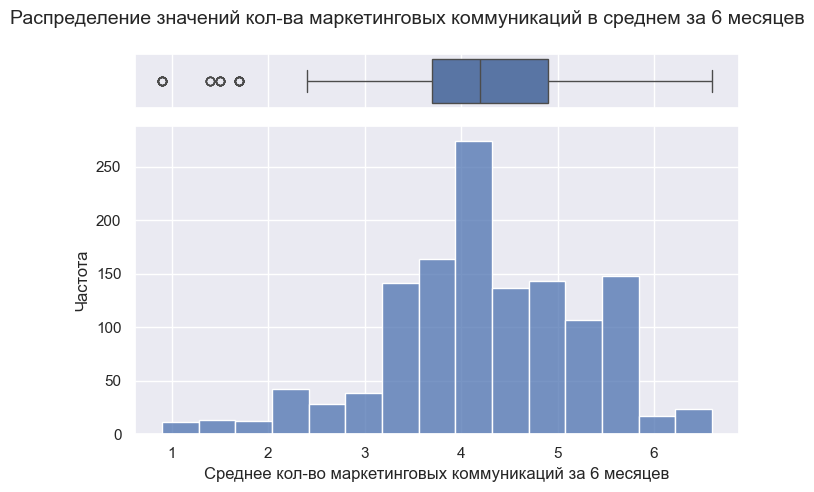

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 6.634154216575553
Критические значения: [0.574 0.654 0.785 0.915 1.089]
Распределение не является нормальным.


In [36]:
analyzis_quantity(df['маркет_актив_6_мес'], 
                  name='Распределение значений кол-ва маркетинговых коммуникаций в среднем за 6 месяцев',
                  x_label='Среднее кол-во маркетинговых коммуникаций за 6 месяцев')

Значения признака **"маркет_актив_6_мес"** имеют ассиметричное распределение с хвостом слева. Выбросы, которые показывает коробочный график мы оставляем без изменений, так как распределение имеет плавный спуск слева.

* Основной диапозон значений - от **3.7** до **4.9**
* Минимальное значение - **0.9**
* Среднее значение - **4.2**
* Максимальное значение - **6.6**

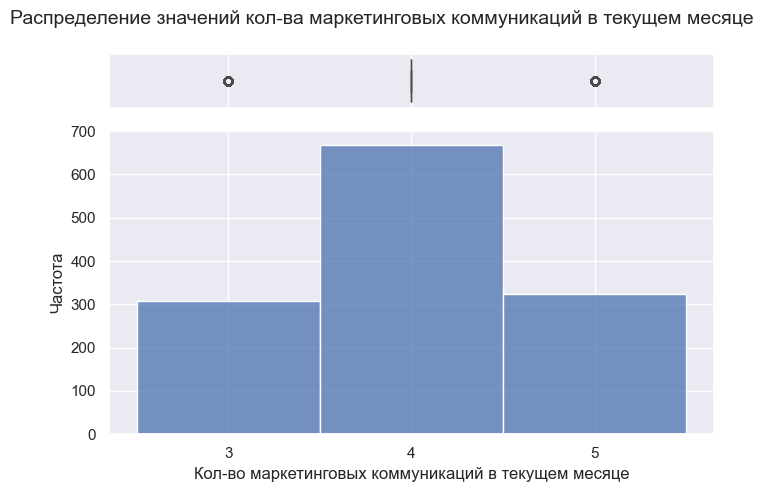

count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: маркет_актив_тек_мес, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 110.02764858997762
Критические значения: [0.574 0.654 0.785 0.915 1.089]
Распределение не является нормальным.


In [37]:
analyzis_quantity(df['маркет_актив_тек_мес'], 
                  name='Распределение значений кол-ва маркетинговых коммуникаций в текущем месяце', 
                  x_label='Кол-во маркетинговых коммуникаций в текущем месяце', 
                  discrete=True)

Значения признака **"маркет_актив_тек_мес"** имеют унимодальное распределение. В данном случае хоть коробочный график и показывает выбросы, они таковыми не являются из-за маленького диапозона значений, оставляем данные без изменений.

* Основной диапозон значений - **4**
* Минимальное значение - **3**
* Среднее значение - **4**
* Максимальное значение - **5**

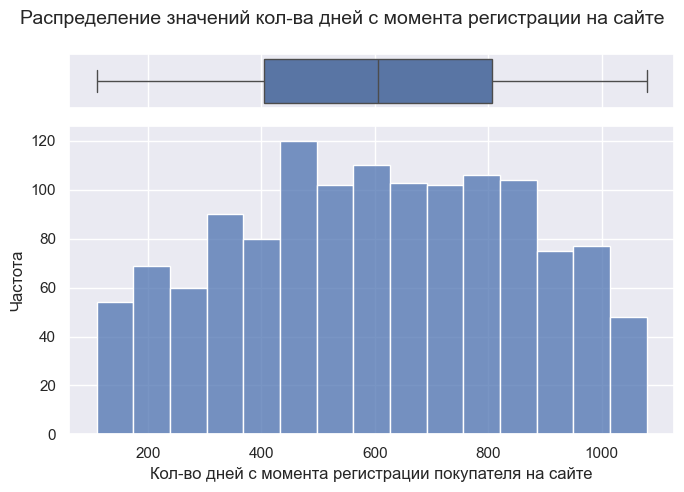

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: длительность, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 7.394110466880875
Критические значения: [0.574 0.654 0.785 0.915 1.089]
Распределение не является нормальным.


In [38]:
analyzis_quantity(df['длительность'], 
                  name='Распределение значений кол-ва дней с момента регистрации на сайте', 
                  x_label='Кол-во дней с момента регистрации покупателя на сайте')

Значения признака **"длительность"** имеет не нормальное распределение . На основе графического анализа оно может быть описано как приближающееся к равномерному / симметричное с тяжёлыми хвостами / усечённое распределение. Выбросы отсутствуют. 

* Основной диапозон значений - от **405.5** до **806**
* Минимальное значение - **110**
* Среднее значение - **606**
* Максимальное значение - **1079**

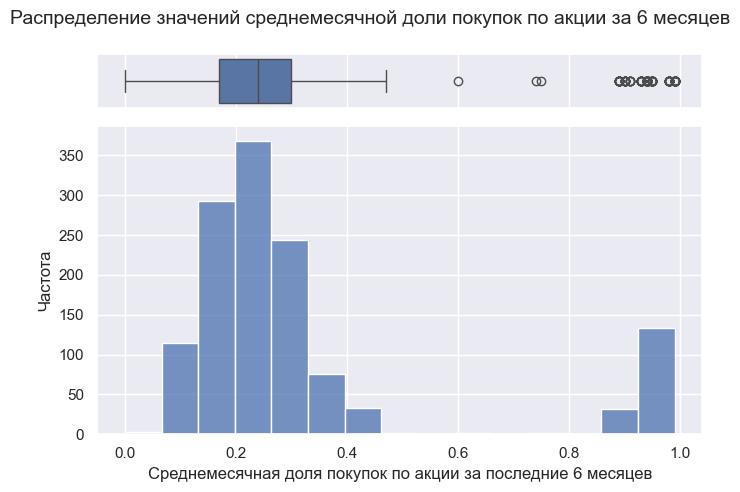

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 177.2918146036459
Критические значения: [0.574 0.654 0.785 0.915 1.089]
Распределение не является нормальным.


In [39]:
analyzis_quantity(df['акционные_покупки'], 
                  name='Распределение значений среднемесячной доли покупок по акции за 6 месяцев', 
                  x_label='Среднемесячная доля покупок по акции за последние 6 месяцев')

Значения признака **"акционные_покупки"** имеют ассиметричное распределение с хвостом и отдельно стоящим пиком справа. Выбросы на данном графике говорят нам о том, что существует отдельная страта покупателей, которая покупает товары в основном только по акции, поэтому эти данные оставляем, как есть.

* Основной диапозон значений - от **0.17** до **0.3**
* Минимальное значение - **0**
* Среднее значение - **0.24**
* Максимальное значение - **0.99**

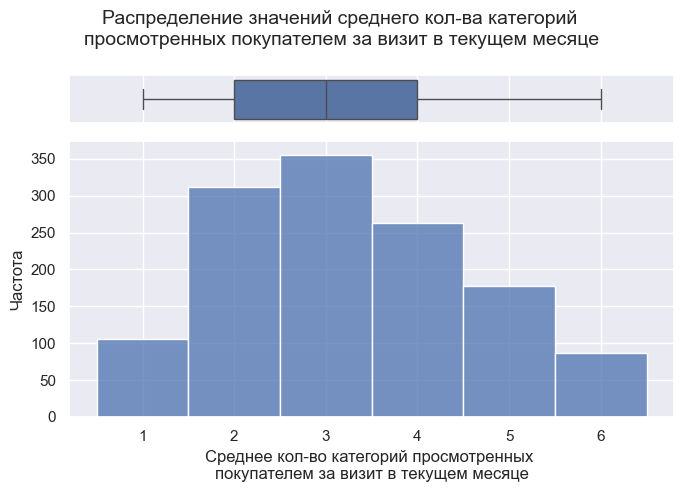

count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: средний_просмотр_категорий_за_визит, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 34.35352007813435
Критические значения: [0.574 0.654 0.785 0.915 1.089]
Распределение не является нормальным.


In [40]:
analyzis_quantity(df['средний_просмотр_категорий_за_визит'], 
                  name='Распределение значений среднего кол-ва категорий \nпросмотренных покупателем за визит в текущем месяце', 
                  x_label='Cреднее кол-во категорий просмотренных \nпокупателем за визит в текущем месяце', 
                  discrete=True)

Значения признака **"средний_просмотр_категорий_за_визит"** имеют ассиметричное распределение с хвостом справа. Выбросы отсутствуют.

* Основной диапозон значений - от **2** до **4**
* Минимальное значение - **1**
* Среднее значение - **3**
* Максимальное значение - **6**

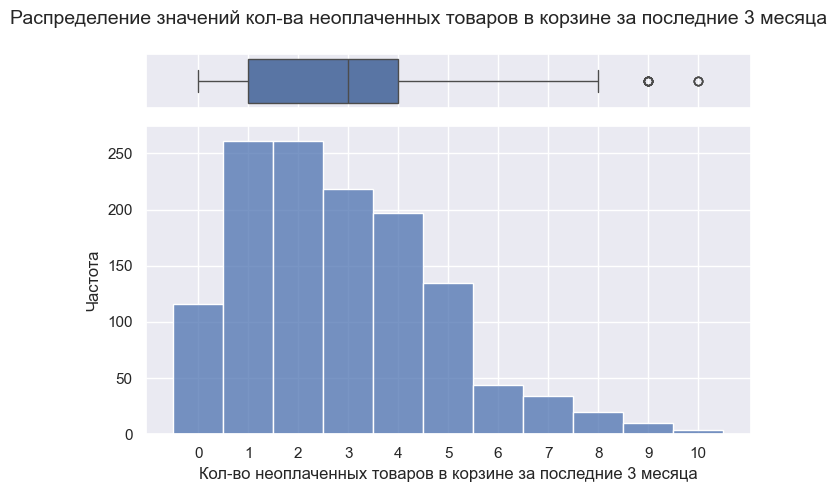

count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 25.76711247719186
Критические значения: [0.574 0.654 0.785 0.915 1.089]
Распределение не является нормальным.


In [41]:
analyzis_quantity(df['неоплаченные_продукты_штук_квартал'], 
                  name='Распределение значений кол-ва неоплаченных товаров в корзине за последние 3 месяца', 
                  x_label='Кол-во неоплаченных товаров в корзине за последние 3 месяца', 
                  discrete=True)

Значения признака **"неоплаченные_продукты_штук_квартал"** имеют положительно скошенное распределение. Выбросы, которые определил коробочный график, таковыми не являются.

* Основной диапозон значений - от **1** до **4**
* Минимальное значение - **0**
* Среднее значение - **3**
* Максимальное значение - **10**

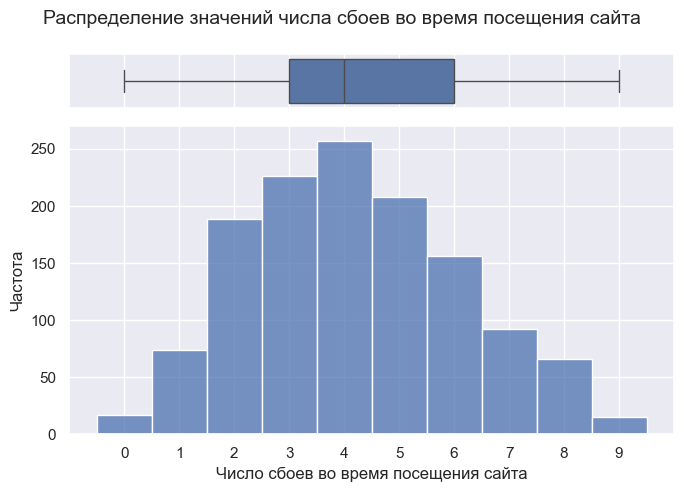

count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: ошибка_сервиса, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 16.976234003877835
Критические значения: [0.574 0.654 0.785 0.915 1.089]
Распределение не является нормальным.


In [42]:
analyzis_quantity(df['ошибка_сервиса'], 
                  name='Распределение значений числа сбоев во время посещения сайта', 
                  x_label='Число сбоев во время посещения сайта', 
                  discrete=True)

Значения признака **"ошибка_сервиса"** имеют распределение с небольшой положительной ассиметрией.

* Основной диапозон значений - от **3** до **6**
* Минимальное значение - **0**
* Среднее значение - **4**
* Максимальное значение - **9**

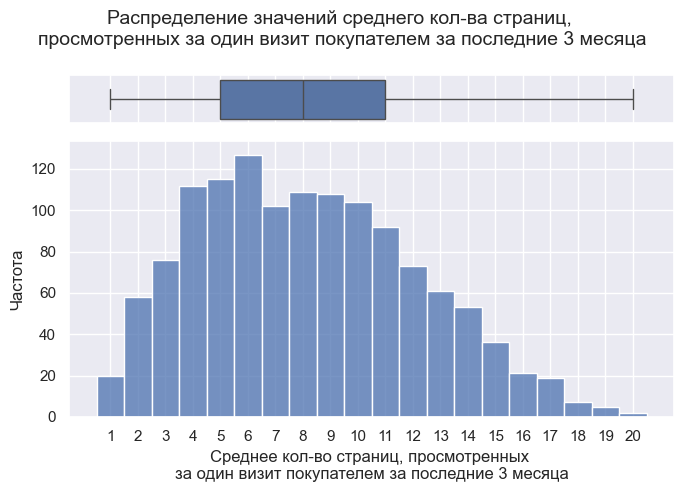

count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 9.652556832408663
Критические значения: [0.574 0.654 0.785 0.915 1.089]
Распределение не является нормальным.


In [43]:
analyzis_quantity(df['страниц_за_визит'], 
                  name='Распределение значений среднего кол-ва страниц, \nпросмотренных за один визит покупателем за последние 3 месяца', 
                  x_label='Cреднее кол-во страниц, просмотренных \nза один визит покупателем за последние 3 месяца', 
                  discrete=True)

Значения признака **"страниц_за_визит"** имеют ассиметричное распределение с хвостом справа.

* Основной диапозон значений - от **5** до **11**
* Минимальное значение - **1**
* Среднее значение - **8**
* Максимальное значение - **20**

#### Категориальные признаки:

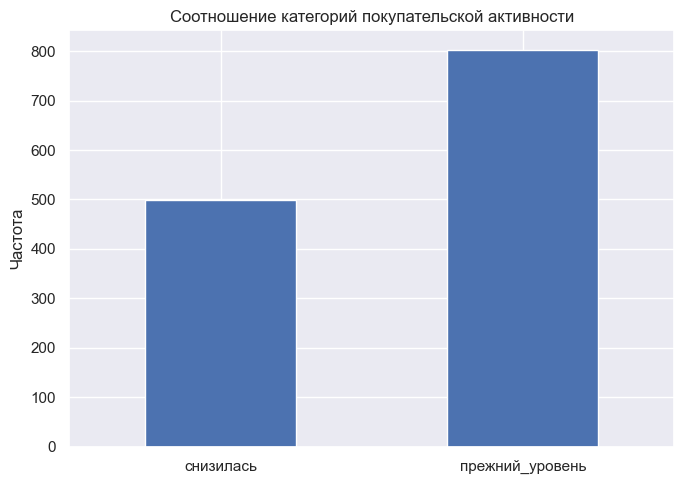

покупательская_активность
снизилась          498
прежний_уровень    802
Name: count, dtype: int64


In [44]:
analyzis_category(df['покупательская_активность'], 
                  name='Соотношение категорий покупательской активности')

Большинство покупателей проявляют прежнюю активность, но доля покупателей, чья активность снизилась довольно весомая **~38%**. 

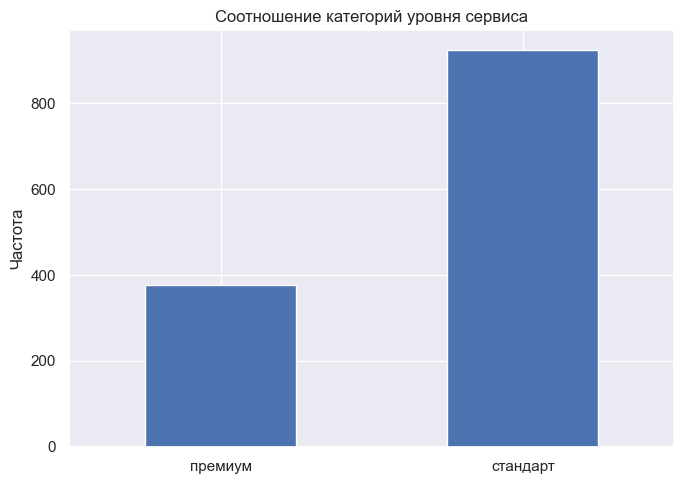

тип_сервиса
премиум     376
стандарт    924
Name: count, dtype: int64


In [45]:
analyzis_category(df['тип_сервиса'], 
                  name='Соотношение категорий уровня сервиса')

Соотношение уровней сервисов покупателей **"премиум"** и **"стандарт" 4:9** соответственно.

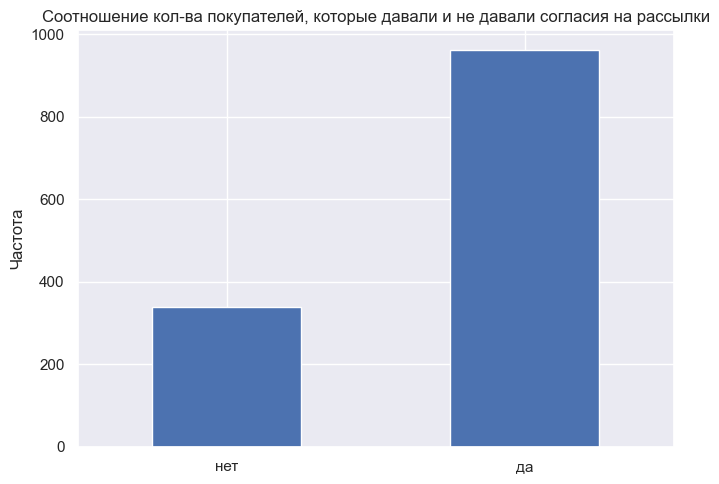

разрешить_сообщать
нет    338
да     962
Name: count, dtype: int64


In [46]:
analyzis_category(df['разрешить_сообщать'], 
                  name='Соотношение кол-ва покупателей, которые давали и не давали согласия на рассылки')

Количество покупателей согласных на рассылки о товарах большинство - **74%**.

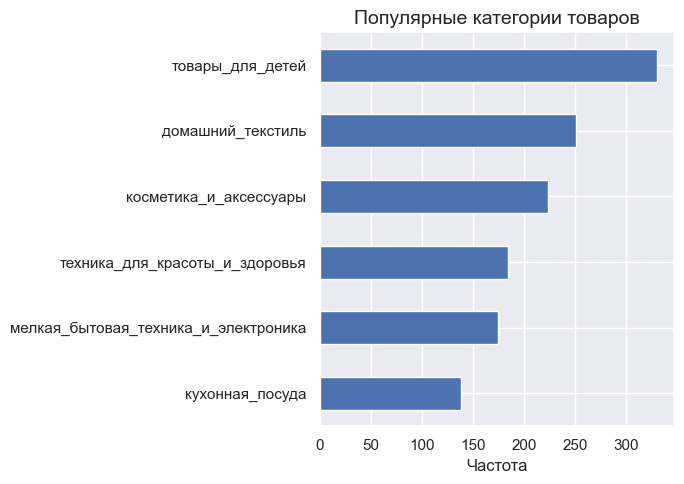

популярная_категория
кухонная_посуда                         138
мелкая_бытовая_техника_и_электроника    174
техника_для_красоты_и_здоровья          184
косметика_и_аксессуары                  223
домашний_текстиль                       251
товары_для_детей                        330
Name: count, dtype: int64


In [47]:
analyzis_category(df['популярная_категория'], 
                  name='Популярные категории товаров', 
                  kind='barh')

Наиболее популярная категория товаров среди покупателей - **товары для детей: ~25%**, категория товаров, которая интересует менее всего - **кухонная посуда: ~10.6%**.

### Датафрейм "df_money":

#### Количественные признаки:

In [48]:
# Вывод статистик по количественным признакам
df_money.describe().T

,count,mean,std,min,25%,50%,75%,max
предыдущий_месяц,1300.0,4936.920385,739.597997,0.0,4496.75,5005.00,5405.625,6869.5
препредыдущий_месяц,1300.0,4825.206923,405.979663,0.0,4583.00,4809.00,5053.500,5663.0
текущий_месяц,1300.0,5314.960846,2939.708156,2758.7,4706.05,5179.95,5761.725,106862.2


Из общей статистики видно, что в предыдущих 2х месяцах есть покупатели, которые не совершали покупок, а так же видно аномально большая выручка в текущем месяце, расмотрим каждый месяц в отдельности.

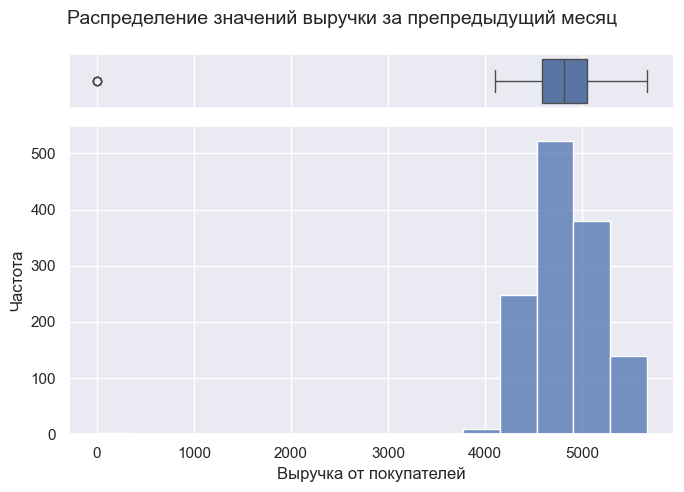

count    1300.000000
mean     4825.206923
std       405.979663
min         0.000000
25%      4583.000000
50%      4809.000000
75%      5053.500000
max      5663.000000
Name: препредыдущий_месяц, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 11.287955386358362
Критические значения: [0.574 0.654 0.785 0.915 1.089]
Распределение не является нормальным.


In [49]:
# Рассмотрим распределение значений выручки за препредыдущий месяц
analyzis_quantity(df_money['препредыдущий_месяц'], 
                  name='Распределение значений выручки за препредыдущий месяц', 
                  x_label='Выручка от покупателей')

Выбросы в значении **0** говорят нам о том, что в этом мясяце есть неактивные покупатели, необходимо избавиться от этих строк, так как они помешают обучению модели.

In [50]:
# Получаем индексы покупателей неактивных в препредыдущем месяце
drop_id = df_money.query('препредыдущий_месяц == 0').index

# Удаляем строки с данными покупателями из всех датафреймов
for data in df_dict.values():
    data.drop(drop_id, inplace=True)

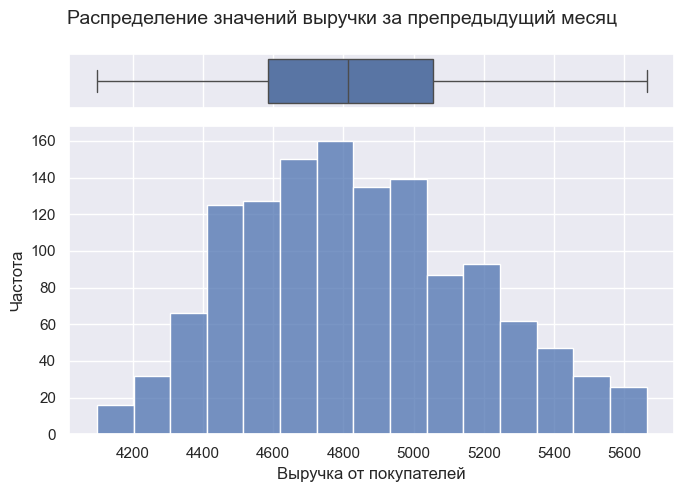

count    1297.000000
mean     4836.367772
std       333.438742
min      4098.000000
25%      4585.000000
50%      4812.000000
75%      5055.000000
max      5663.000000
Name: препредыдущий_месяц, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 4.113050832450199
Критические значения: [0.574 0.654 0.785 0.915 1.089]
Распределение не является нормальным.


In [51]:
# Рассмотрим распределение значений выручки за препредыдущий месяц
analyzis_quantity(df_money['препредыдущий_месяц'], 
                  name='Распределение значений выручки за препредыдущий месяц', 
                  x_label='Выручка от покупателей')

Значения выручки за **"препредыдущий_месяц"** имеют распределение с небольшой положительной ассиметрией. За данный месяц было **3** неактивных покупателя.

* Основной диапозон значений - от **4585** до **5055**
* Минимальное значение - **4098**
* Среднее значение - **4812**
* Максимальное значение - **5663**

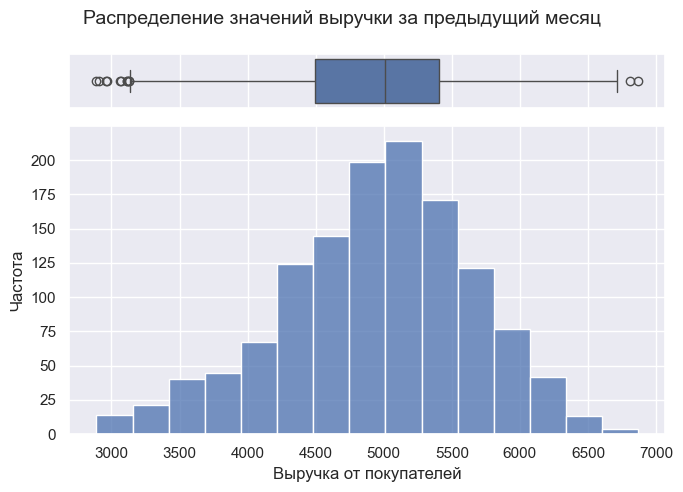

count    1297.000000
mean     4948.339630
std       701.228571
min      2890.000000
25%      4498.500000
50%      5005.500000
75%      5409.000000
max      6869.500000
Name: предыдущий_месяц, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 3.4183686885239695
Критические значения: [0.574 0.654 0.785 0.915 1.089]
Распределение не является нормальным.


In [52]:
# Рассмотрим распределение значений выручки за предыдущий месяц
analyzis_quantity(df_money['предыдущий_месяц'], 
                  name='Распределение значений выручки за предыдущий месяц', 
                  x_label='Выручка от покупателей')

Значения выручки за **"предыдущий_месяц"** имеют распределение с отрицательной ассиметрией. Выбросы, которые показывает коробочный график таковыми не являются, оставляем все без изменений.

* Основной диапозон значений - от **4498.5** до **5409**
* Минимальное значение - **2890**
* Среднее значение - **5005.5**
* Максимальное значение - **6869.5**

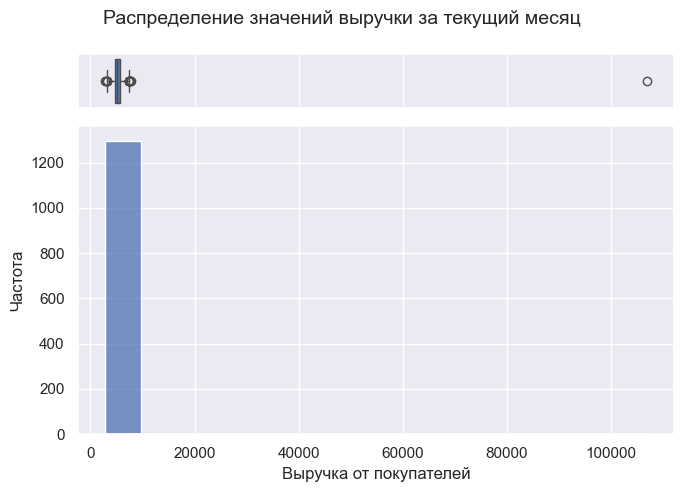

count      1297.000000
mean       5316.449268
std        2942.469139
min        2758.700000
25%        4706.600000
50%        5180.300000
75%        5761.300000
max      106862.200000
Name: текущий_месяц, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 235.0641285573697
Критические значения: [0.574 0.654 0.785 0.915 1.089]
Распределение не является нормальным.


In [53]:
# Рассмотрим распределение значений выручки за текущий месяц
analyzis_quantity(df_money['текущий_месяц'], 
                  name='Распределение значений выручки за текущий месяц', 
                  x_label='Выручка от покупателей')

Необходимо избавиться от аномального значения, оно так же будет мешать моделированию.

In [54]:
# Получаем строку с аномальным значением
drop_id = df_money.query('текущий_месяц == 106862.2').index

# Удаляем строки с покупателем с аномальным значением
for data in df_dict.values():
    data.drop(drop_id, inplace=True)

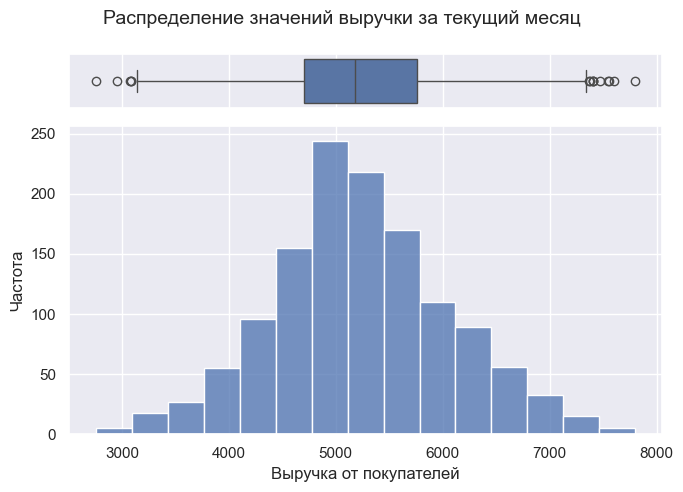

count    1296.000000
mean     5238.096065
std       834.318717
min      2758.700000
25%      4706.050000
50%      5179.950000
75%      5759.275000
max      7799.400000
Name: текущий_месяц, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 2.572946750826759
Критические значения: [0.574 0.654 0.785 0.915 1.089]
Распределение не является нормальным.


In [55]:
# Рассмотрим распределение значений выручки за текущий месяц
analyzis_quantity(df_money['текущий_месяц'], 
                  name='Распределение значений выручки за текущий месяц', 
                  x_label='Выручка от покупателей')

Значения выручки за **"текущий_месяц"** имеют распределение с легкой положительной ассиметрией. Выбросы, которые показывает коробочный график таковыми не являются, оставляем все без изменений.

* Основной диапозон значений - от **4706.05** до **5759.28**
* Минимальное значение - **2758.7**
* Среднее значение - **5179.95**
* Максимальное значение - **7799.4**

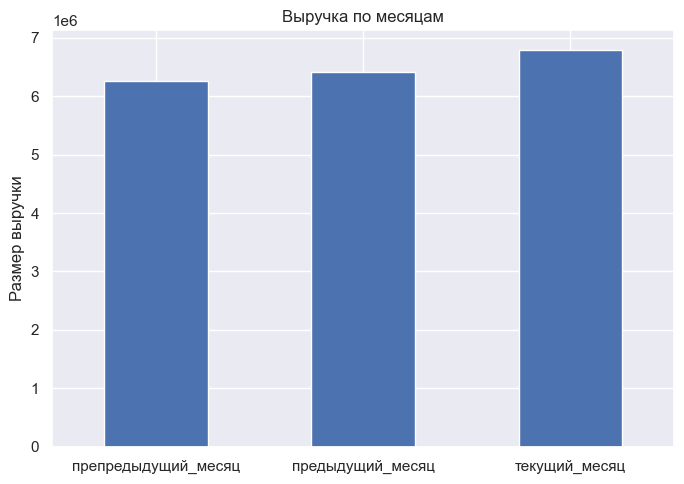

препредыдущий_месяц    6267718.0
предыдущий_месяц       6411919.5
текущий_месяц          6788572.5
dtype: float64


In [56]:
# Рассмотрим динамику выручки по месяцам
# Сумма выручки по месяцам
revenue_month = df_money.sum().sort_values(ascending=True)

# Создание столбчатого графика
plot_bar = revenue_month.plot(kind='bar', figsize=(7, 5), grid=True)

# Настройка заголовка и подписей
plt.title('Выручка по месяцам')
plt.xlabel('')
plt.ylabel('Размер выручки')
plt.xticks(rotation=0)

# Отображаем график
plt.tight_layout()
plt.show()

# Вывод значений в табличном виде
print(revenue_month)

Выручка растет ежемесячно в среднем на **4.1%**.

### Датафрейм "df_time":

#### Количественые признаки:

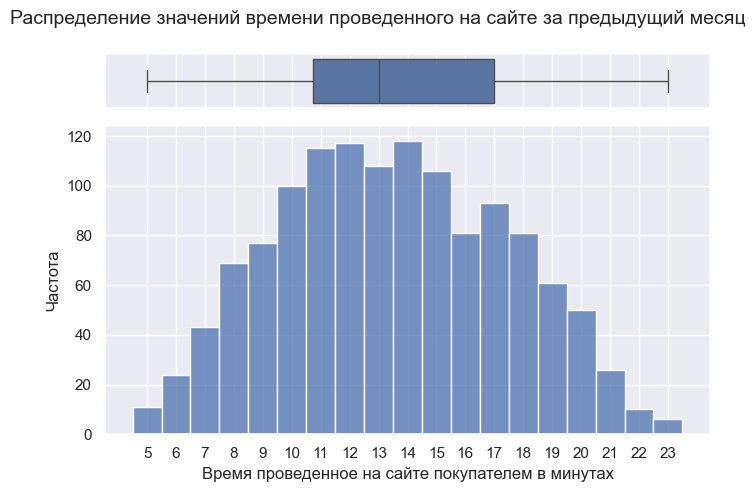

count    1296.000000
mean       13.470679
std         3.937630
min         5.000000
25%        10.750000
50%        13.000000
75%        17.000000
max        23.000000
Name: предыдущий_месяц, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 6.653550684580296
Критические значения: [0.574 0.654 0.785 0.915 1.089]
Распределение не является нормальным.


In [57]:
# Рассмотрим распределение значений времени проведенного на сайте за предыдущий месяц
analyzis_quantity(df_time['предыдущий_месяц'], 
                  name='Распределение значений времени проведенного на сайте за предыдущий месяц', 
                  x_label='Время проведенное на сайте покупателем в минутах', 
                  discrete=True)

Значения времени за **"предыдущий_месяц"** имеют распределение с легкой положительной ассиметрией. Выбросы отсутствуют.

* Основной диапозон значений - от **10.75** до **17**
* Минимальное значение - **5**
* Среднее значение - **13**
* Максимальное значение - **23**

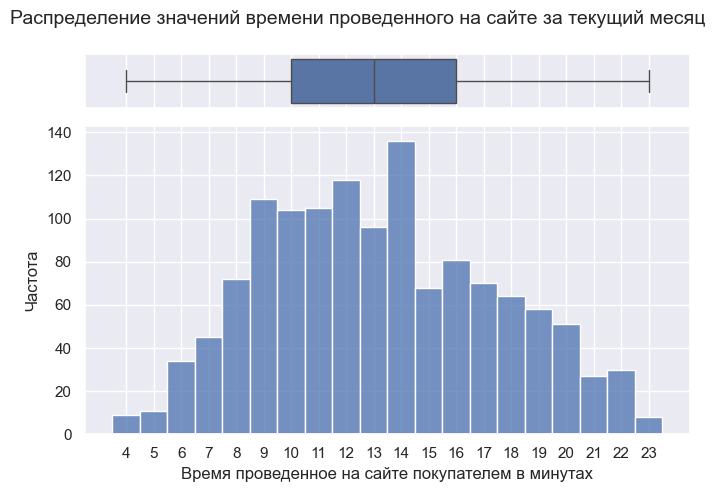

count    1296.000000
mean       13.210648
std         4.221794
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: текущий_месяц, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 7.980797825696072
Критические значения: [0.574 0.654 0.785 0.915 1.089]
Распределение не является нормальным.


In [58]:
# Рассмотрим распределение значений времени проведенного на сайте за текущий месяц
analyzis_quantity(df_time['текущий_месяц'], 
                  name='Распределение значений времени проведенного на сайте за текущий месяц', 
                  x_label='Время проведенное на сайте покупателем в минутах', 
                  discrete=True)

Значения времени за **"текущий_месяц"** имеют распределение с положительной ассиметрией и тяжелым хвостом справа. Выбросы отсутствуют.

* Основной диапозон значений - от **10** до **16**
* Минимальное значение - **4**
* Среднее значение - **13**
* Максимальное значение - **23**

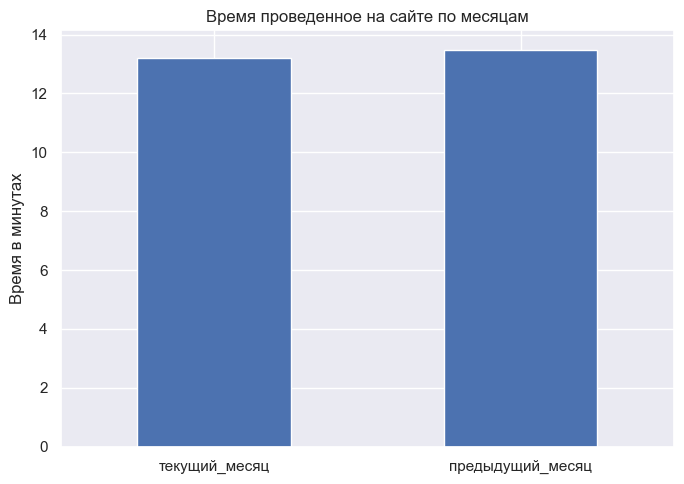

текущий_месяц       13.210648
предыдущий_месяц    13.470679
dtype: float64


In [59]:
# Рассмотрим динамику проведенного времени на сайте по месяцам
# Сумма выручки по месяцам
time_on_site = df_time.mean().sort_values(ascending=True)

# Создание столбчатого графика
plot_bar = time_on_site.plot(kind='bar', figsize=(7, 5), grid=True)

# Настройка заголовка и подписей
plt.title('Время проведенное на сайте по месяцам')
plt.xlabel('')
plt.ylabel('Время в минутах')
plt.xticks(rotation=0)

# Отображаем график
plt.tight_layout()
plt.show()

# Вывод значений в табличном виде
print(time_on_site)

Время проведенное на сайте в текущем месяце на **~2%** ниже, чем предыдущем.

### Датафрей "df_money_mean":

#### Количественные признаки:

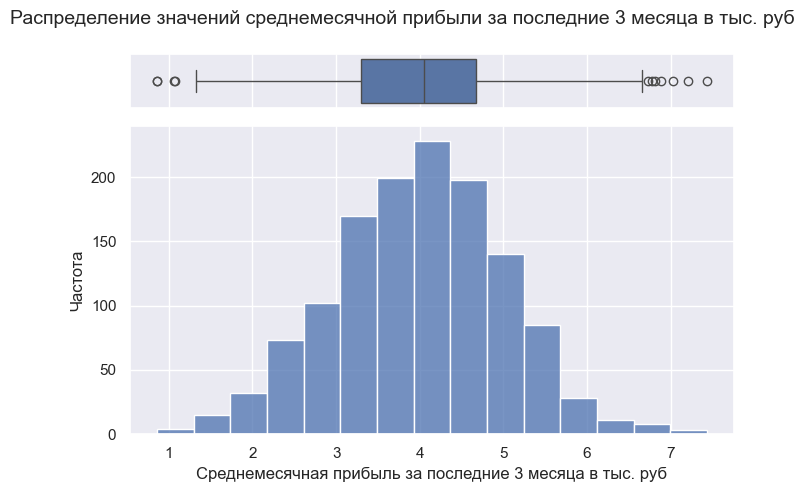

count    1296.000000
mean        3.997701
std         1.011198
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 0.5973632120299044
Критические значения: [0.574 0.654 0.785 0.915 1.089]
Распределение нормальное.


In [60]:
# Рассмотрим распределение значений среднемесячной прибыли за последние 3 месяца
analyzis_quantity(df_money_mean['прибыль'], 
                  name='Распределение значений среднемесячной прибыли за последние 3 месяца в тыс. руб', 
                  x_label='Среднемесячная прибыль за последние 3 месяца в тыс. руб')

Значения **прибыли**, опираясь на тест Андерсона, стремятся к нормальному распределению. Выбросы, показанные на коробочном графике таковыми не являются, оставляем все как есть.

* Основной диапозон значений - от **3.3** до **4.67** тыс. руб.
* Минимальное значение - **0.86** тыс. руб.
* Среднее значение - **4.05** тыс. руб.
* Максимальное значение - **7.43** тыс. руб.

### Вывод:

#### Датафрейм "df":

**Количественные признаки:**

Значения признака **"маркет_актив_6_мес"** имеют ассиметричное распределение с хвостом слева. Выбросы, которые показывает коробочный график мы оставляем без изменений, так как распределение имеет плавный спуск слева.

* Основной диапозон значений - от **3.7** до **4.9**
* Минимальное значение - **0.9**
* Среднее значение - **4.2**
* Максимальное значение - **6.6**

Значения признака **"маркет_актив_тек_мес"** имеют унимодальное распределение. В данном случае хоть коробочный график и показывает выбросы, они таковыми не являются из-за маленького диапозона значений, оставляем данные без изменений.

* Основной диапозон значений - **4**
* Минимальное значение - **3**
* Среднее значение - **4**
* Максимальное значение - **5**

Значения признака **"длительность"** имеет не нормальное распределение . На основе графического анализа оно может быть описано как приближающееся к равномерному / симметричное с тяжёлыми хвостами / усечённое распределение. Выбросы отсутствуют. 

* Основной диапозон значений - от **405.5** до **806**
* Минимальное значение - **110**
* Среднее значение - **606**
* Максимальное значение - **1079**

Значения признака **"акционные_покупки"** имеют ассиметричное распределение с хвостом и отдельно стоящим пиком справа. Выбросы на данном графике говорят нам о том, что существует отдельная страта покупателей, которая покупает товары в основном только по акции, поэтому эти данные оставляем, как есть.

* Основной диапозон значений - от **0.17** до **0.3**
* Минимальное значение - **0**
* Среднее значение - **0.24**
* Максимальное значение - **0.99**

Значения признака **"средний_просмотр_категорий_за_визит"** имеют ассиметричное распределение с хвостом справа. Выбросы отсутствуют.

* Основной диапозон значений - от **2** до **4**
* Минимальное значение - **1**
* Среднее значение - **3**
* Максимальное значение - **6**

Значения признака **"неоплаченные_продукты_штук_квартал"** имеют положительно скошенное распределение. Выбросы, которые определил коробочный график, таковыми не являются.

* Основной диапозон значений - от **1** до **4**
* Минимальное значение - **0**
* Среднее значение - **3**
* Максимальное значение - **10**

Значения признака **"ошибка_сервиса"** имеют распределение с небольшой положительной ассиметрией.

* Основной диапозон значений - от **3** до **6**
* Минимальное значение - **0**
* Среднее значение - **4**
* Максимальное значение - **9**

Значения признака **"страниц_за_визит"** имеют ассиметричное распределение с хвостом справа.

* Основной диапозон значений - от **5** до **11**
* Минимальное значение - **1**
* Среднее значение - **8**
* Максимальное значение - **20**

**Категориальные признаки:**

* Большинство покупателей проявляют **прежнюю активность**, но доля покупателей, чья **активность снизилась** довольно весомая **~38%**.
* Соотношение уровней сервисов покупателей **"премиум"** и **"стандарт" 4:9** соответственно.
* Количество покупателей согласных на рассылки о товарах **большинство - 74%**.
* Наиболее популярная категория товаров среди покупателей - **товары для детей: ~25%**, категория товаров, которая интересует менее всего - **кухонная посуда: ~10.6%**.

#### Датафрейм "df_money":

**Количественные признаки:**

Значения выручки за **"препредыдущий_месяц"** имеют распределение с небольшой положительной ассиметрией. За данный месяц было **3** неактивных покупателя.

* Основной диапозон значений - от **4585** до **5055**
* Минимальное значение - **4098**
* Среднее значение - **4812**
* Максимальное значение - **5663**

Значения выручки за **"предыдущий_месяц"** имеют распределение с отрицательной ассиметрией. Выбросы, которые показывает коробочный график таковыми не являются, оставляем все без изменений.

* Основной диапозон значений - от **4498.5** до **5409**
* Минимальное значение - **2890**
* Среднее значение - **5005.5**
* Максимальное значение - **6869.5**

Значения выручки за **"текущий_месяц"** имеют распределение с легкой положительной ассиметрией. Выбросы, которые показывает коробочный график таковыми не являются, оставляем все без изменений.

* Основной диапозон значений - от **4706.05** до **5759.28**
* Минимальное значение - **2758.7**
* Среднее значение - **5179.95**
* Максимальное значение - **7799.4**

#### Датафрейм "df_time":

**Количественные признаки:**

Значения времени за **"предыдущий_месяц"** имеют распределение с легкой положительной ассиметрией. Выбросы отсутствуют.

* Основной диапозон значений - от **10.75** до **17**
* Минимальное значение - **5**
* Среднее значение - **13**
* Максимальное значение - **23**

Значения времени за **"текущий_месяц"** имеют распределение с положительной ассиметрией и тяжелым хвостом справа. Выбросы отсутствуют.

* Основной диапозон значений - от **10** до **16**
* Минимальное значение - **4**
* Среднее значение - **13**
* Максимальное значение - **23**

#### Датафрейм "df_money_mean":

**Количественные признаки:**

Значения **прибыли**, опираясь на тест Андерсона, стремятся к нормальному распределению. Выбросы, показанные на коробочном графике таковыми не являются, оставляем все как есть.

* Основной диапозон значений - от **3.3** до **4.67** тыс. руб.
* Минимальное значение - **0.86** тыс. руб.
* Среднее значение - **4.05** тыс. руб.
* Максимальное значение - **7.43** тыс. руб.

#### Итоги анализа распределений и предобработка признаков:

* По итогам иследовательского анализа было удалено из датафреймов по 4 строки, в данных строках находились **3** покупателя с активностью менее 3х месяцев, а так же покупатель с очень крупной покупкой в размере **106862.2 руб.**, так как это единичный случай и не выражает общих закономерностей в данных.
* По данным таблицы **"df_money"** мы видим, что **выручка растет** каждый месяц в среднем на **4,1%**.
* Время проведенное на сайте в свою очередь наоборот **снижается**, в текущем месяце это время снизилось на **~2%** по сравнению с предыдущим месяцем.

## Объединение таблиц:

Объединим таблицы **"df", "df_money"** и **"df_time"** в одну для дальнейшего корреляционного анализа и обучения моделей машинного обучения.

In [61]:
# Переименовываем столбцы
df_money.columns = ['выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']
df_time.columns = ['время_предыдущий_месяц', 'время_текущий_месяц']

# Объединяем таблицы по индексам
df_main = df.join(df_money)
df_main = df_main.join(df_time)

# Проверяем результат
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   покупательская_активность            1296 non-null   object 
 1   тип_сервиса                          1296 non-null   object 
 2   разрешить_сообщать                   1296 non-null   object 
 3   маркет_актив_6_мес                   1296 non-null   float64
 4   маркет_актив_тек_мес                 1296 non-null   int64  
 5   длительность                         1296 non-null   int64  
 6   акционные_покупки                    1296 non-null   float64
 7   популярная_категория                 1296 non-null   object 
 8   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 9   неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 10  ошибка_сервиса                       1296 non-null   int64  
 11  страниц_за_визит            

Таблицы объединены, количество строк корректное, пропусков не образовалось, можем начать корреляционный анализ.

## Корреляционный анализ:

### Матрица корреляции:

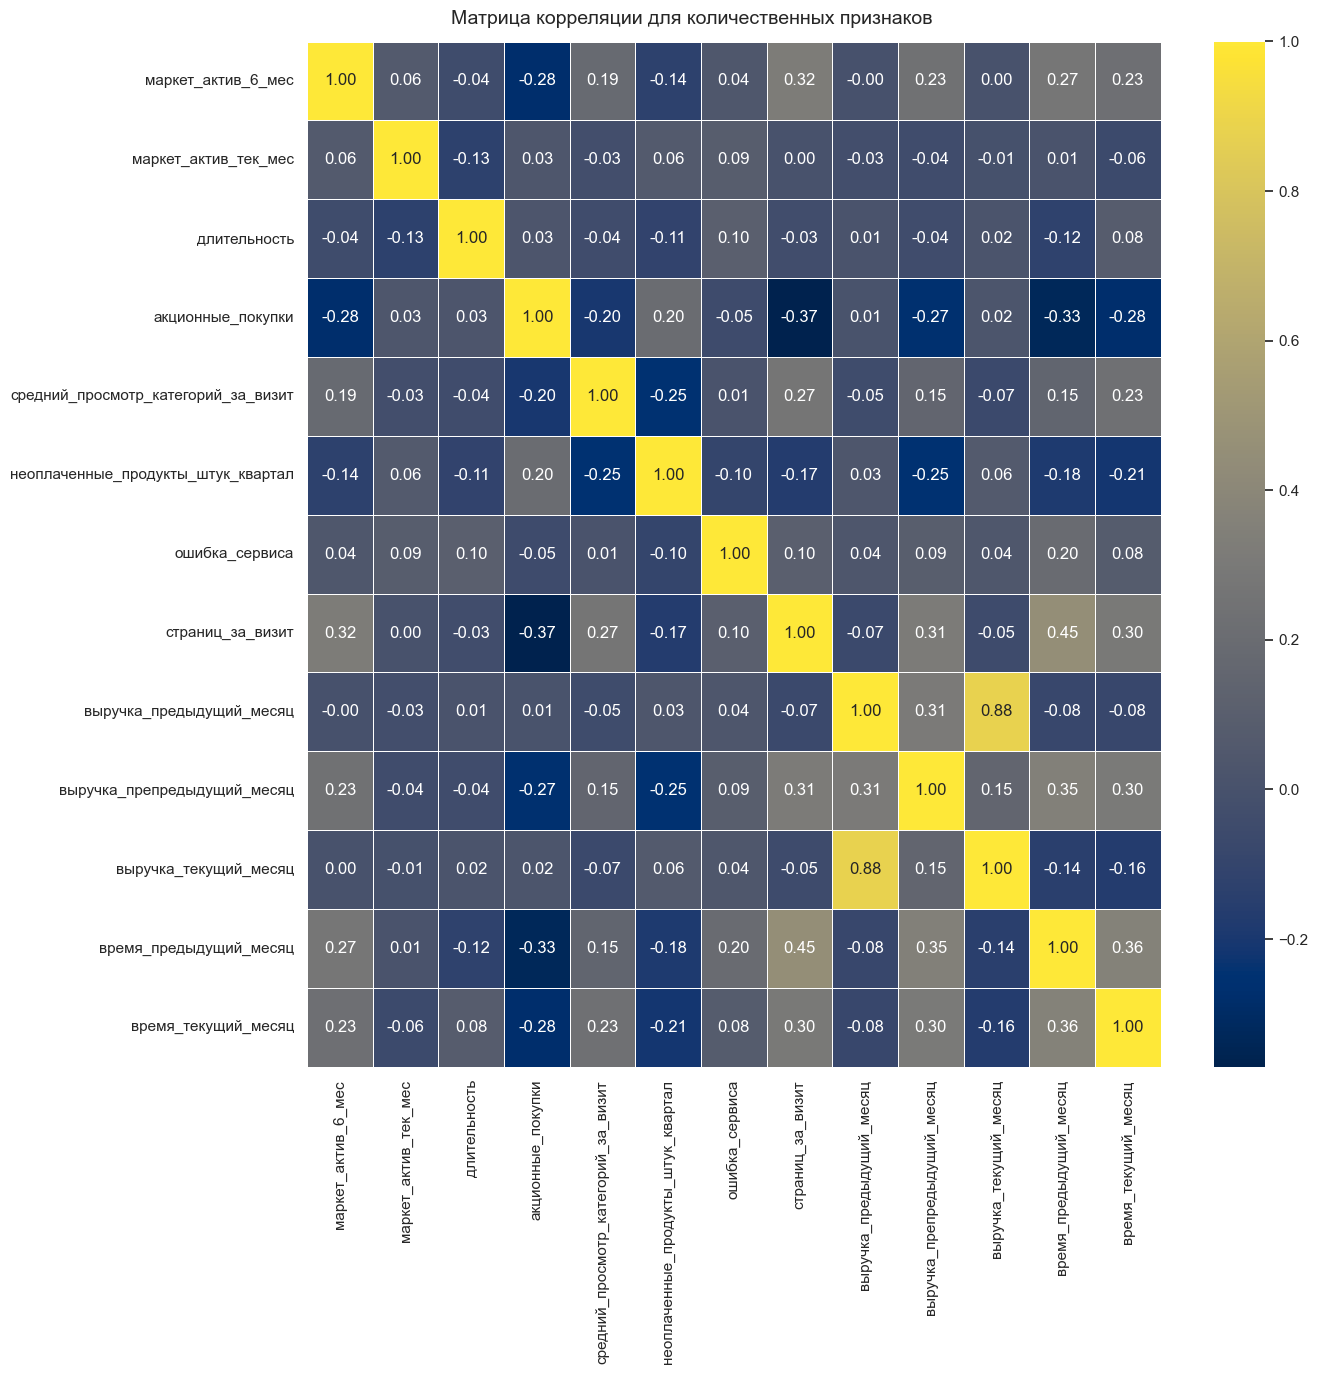

In [62]:
# Список колонок с количественными значениями
quantity_columns = df_main.select_dtypes(include='number').columns.tolist()

# Строим тепловую карту
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df_main[quantity_columns].corr(method='spearman'), annot=True, 
            fmt='.2f', linewidths=.5, cmap='cividis', ax=ax)

# Настройка заголовка и подписей
f.suptitle('Матрица корреляции для количественных признаков', fontsize=14)
plt.xticks(rotation=90)

# Отображаем график
plt.tight_layout()
plt.show()

На графике мы наблюдаем довольно сильную корреляцию между признаками **"выручка_предыдущий_месяц"** и **"выручка_текущий_месяц"** это может говорить о мультиколлениарности, поэтому необходимо преобразовать эти признаки, чтобы избежать мультиколлениарность и не потерять информативности этих признаков.

Вычислим тренд по трем месяцам выручки.

In [63]:
# Формируем новый признак
df_main['выручка_тренд'] = ((df_main['выручка_предыдущий_месяц'] - df_main['выручка_препредыдущий_месяц']) + \
                           (df_main['выручка_текущий_месяц'] - df_main['выручка_предыдущий_месяц']))/2

Проверим новый признак на выбросы

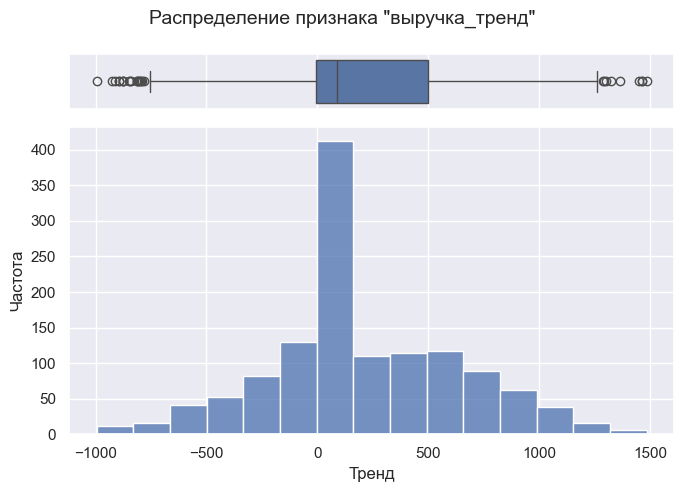

count    1296.000000
mean      200.946952
std       430.001106
min      -994.650000
25%        -6.887500
50%        89.425000
75%       500.275000
max      1483.200000
Name: выручка_тренд, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 15.893366292874362
Критические значения: [0.574 0.654 0.785 0.915 1.089]
Распределение не является нормальным.


In [64]:
analyzis_quantity(df_main['выручка_тренд'], 
                  name='Распределение признака "выручка_тренд"', 
                  x_label='Тренд')

По явному пику, который находится в районе нуля мы можем сказать, что в основном динамика выручки стабильная. Так же видим, что основная часть значения находится в положительном диапозоне чисел, что говорит нам о том, что основная часть покупателей выборки за последние месяцы увеличили свои траты на сайте.

Построим матрицу корреляции повторно.

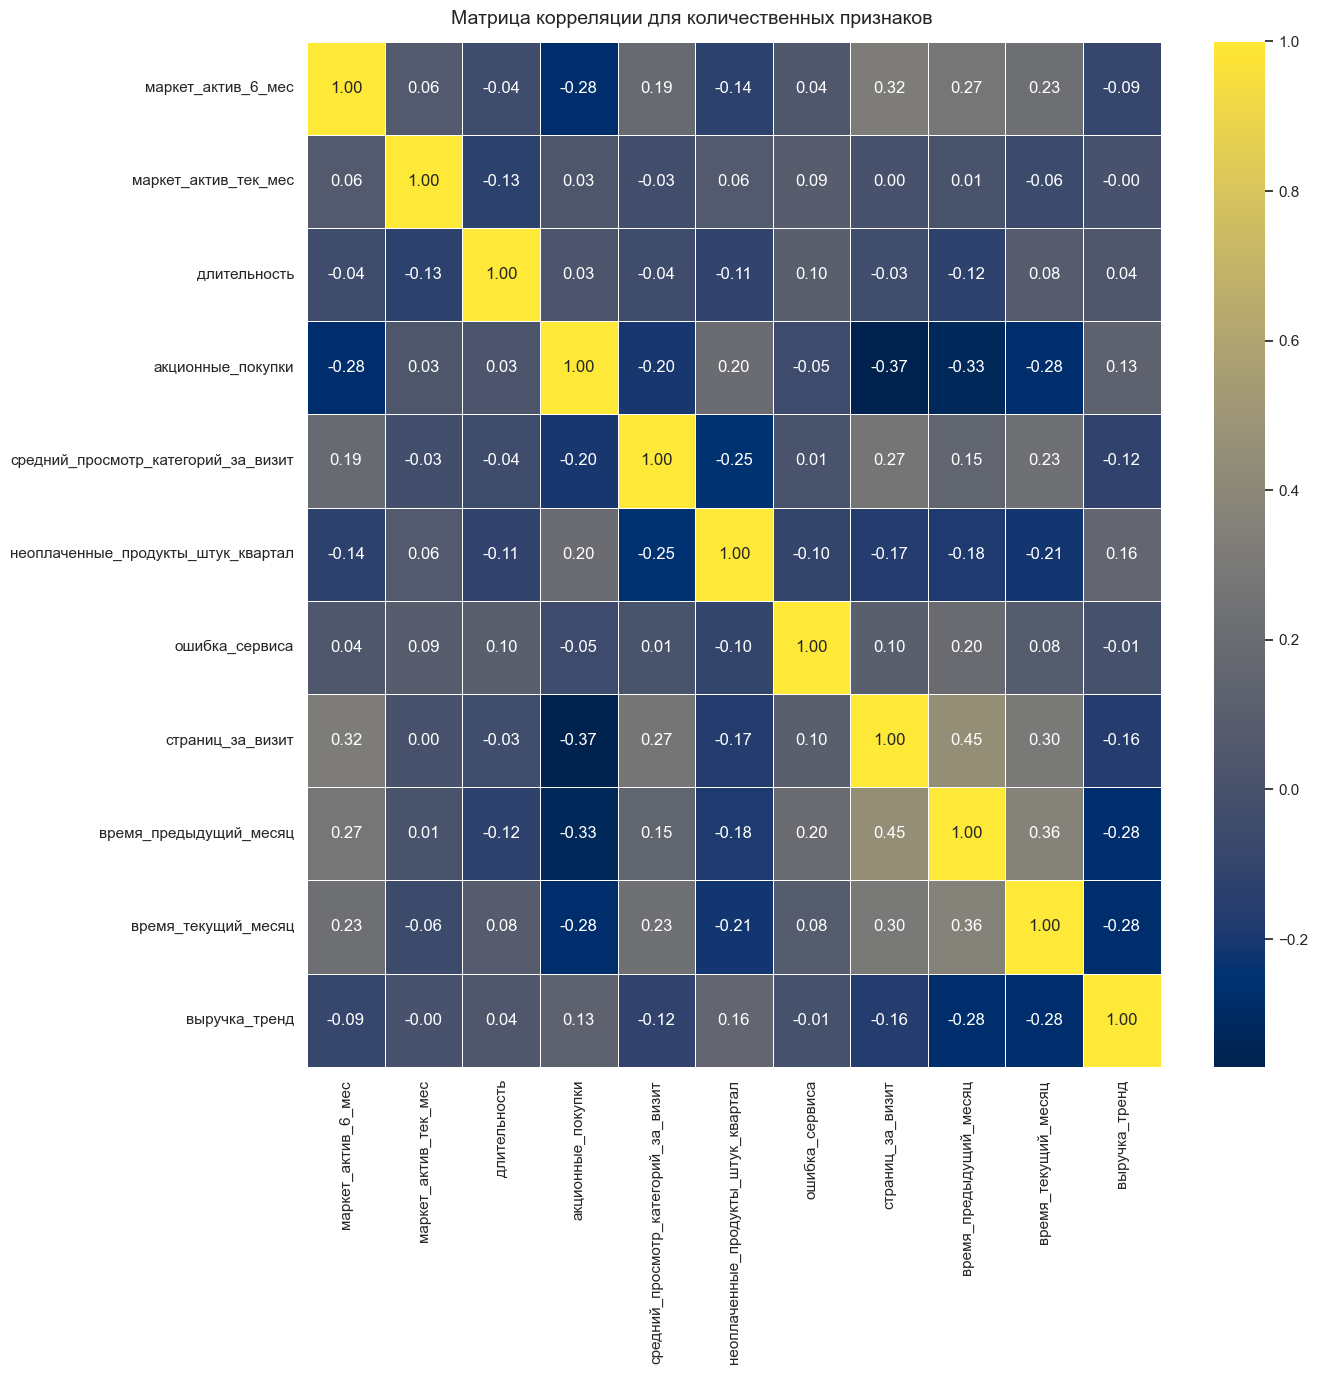

In [65]:
# Список признаков о выручках
revenue = ['выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']

# Список колонок с количественными значениями
quantity_columns = df_main.select_dtypes(include='number').drop(columns=revenue).columns.tolist()

# Строим тепловую карту
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df_main[quantity_columns].corr(method='spearman'), annot=True, 
            fmt='.2f', linewidths=.5, cmap='cividis', ax=ax)

# Настройка заголовка и подписей
f.suptitle('Матрица корреляции для количественных признаков', fontsize=14)
plt.xticks(rotation=90)

# Отображаем график
plt.tight_layout()
plt.show()

Теперь мы наблюдаем корреляции только на **низком** и **умеренном уровне**, что нам говорит о том, что каждый признак может дать модели полезную информации не дублируя другой.

### VIF-фактор:

Сделаем дополнительную проверку на мультиколлениарность с помощью VIF-фактора.

In [66]:
# Построение таблицы с расчитанным VIF
vif_data = pd.DataFrame()
vif_data['input attribute'] = quantity_columns
vif_data['vif'] = ([variance_inflation_factor(df_main[quantity_columns].values, i) 
                    for i in range(df_main[quantity_columns].shape[1])])
vif_data

,input attribute,vif
0,маркет_актив_6_мес,20.370168
1,маркет_актив_тек_мес,22.500051
2,длительность,6.466142
3,акционные_покупки,2.837657
4,средний_просмотр_категорий_за_визит,7.523604
5,неоплаченные_продукты_штук_квартал,3.284608
6,ошибка_сервиса,6.021235
7,страниц_за_визит,7.181534
8,время_предыдущий_месяц,17.530575
9,время_текущий_месяц,13.346349


Исходя из полученных результатов мы видим, что у нас довольно высокая мультиколлениарность или нелинейная зависимость наблюдается в парах: 

* **"маркет_актив_6_мес"** и **"маркет_актив_тек_мес"**
* **"время_предыдущий_месяц"** и **"время_текущий_месяц"**

В признаках времени проведенного на сайте нас так же интересует динамика, создадим общий признак **"время_дельта"**, который будет учитывать изменения количества проведенного времени на сайте текущего месяца по сравнению с предыдущим.

Во втором случае мы будем использовать тот же подход, так у нас будет информация, на сколько отличается текущее значения от среднего, что будет говорить о уровне маркетинговой коммуникации с покупателеми.

Добавим новые признаки и построим таблицу повторно.

In [67]:
# Новый признак дельты времяни проведенного на сайте
df_main['время_дельта'] = df_main['время_текущий_месяц'] - df_main['время_предыдущий_месяц']

# Новый признак "маркет_актив_дельта"
df_main['маркет_актив_дельта'] = df_main['маркет_актив_тек_мес'] - df_main['маркет_актив_6_мес']

Рассмотрим распределения новых признаков.

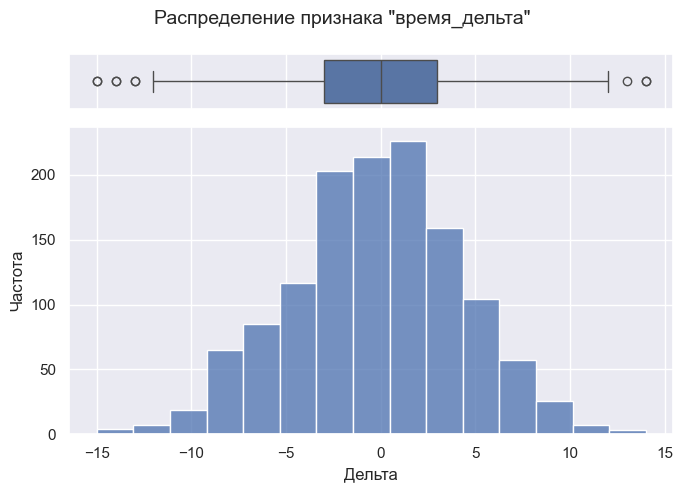

count    1296.000000
mean       -0.260031
std         4.659310
min       -15.000000
25%        -3.000000
50%         0.000000
75%         3.000000
max        14.000000
Name: время_дельта, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 2.9936239509383995
Критические значения: [0.574 0.654 0.785 0.915 1.089]
Распределение не является нормальным.


In [68]:
analyzis_quantity(df_main['время_дельта'], 
                  name='Распределение признака "время_дельта"', 
                  x_label='Дельта')

Мы имеем нормальное распредление, основной диапозон значений находится близи нуля, что говорит нам о том, что основная масса покупателей тратит времени на сайте столько же, сколько в предыдущем месяце.

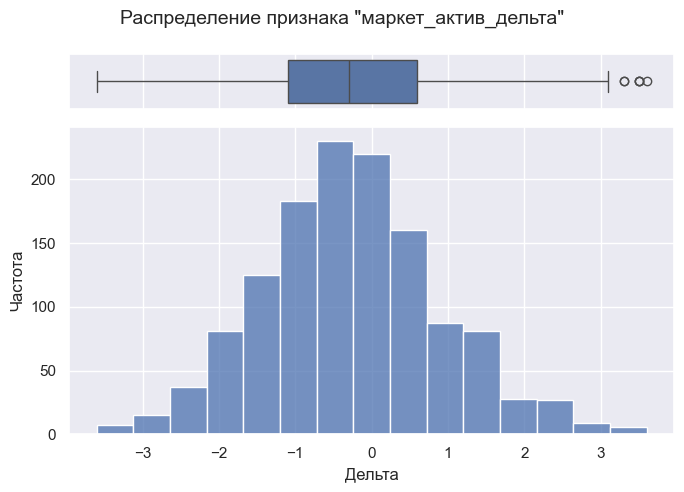

count    1296.000000
mean       -0.247145
std         1.195522
min        -3.600000
25%        -1.100000
50%        -0.300000
75%         0.600000
max         3.600000
Name: маркет_актив_дельта, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 2.327025844462696
Критические значения: [0.574 0.654 0.785 0.915 1.089]
Распределение не является нормальным.


In [69]:
analyzis_quantity(df_main['маркет_актив_дельта'], 
                  name='Распределение признака "маркет_актив_дельта"', 
                  x_label='Дельта')

Пик смещен влево относительно нуля, что говорит нам о том, что маркетинговая активность снизилась относительно средних значений за полгода.

In [70]:
# Обновляем список отобранных признаков
filter_col = ['выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 
              'время_текущий_месяц', 'время_предыдущий_месяц', 'маркет_актив_6_мес', 
              'маркет_актив_тек_мес']

quantity_columns = df_main.select_dtypes(include='number').drop(columns=filter_col).columns.tolist()

# Построение таблицы с расчитанным VIF
vif_data = pd.DataFrame()
vif_data['input attribute'] = quantity_columns
vif_data['vif'] = ([variance_inflation_factor(df_main[quantity_columns].values, i) 
                    for i in range(df_main[quantity_columns].shape[1])])
vif_data

,input attribute,vif
0,длительность,5.709016
1,акционные_покупки,2.703102
2,средний_просмотр_категорий_за_визит,5.784091
3,неоплаченные_продукты_штук_квартал,2.834235
4,ошибка_сервиса,5.213817
5,страниц_за_визит,5.512229
6,выручка_тренд,1.259935
7,время_дельта,1.085317
8,маркет_актив_дельта,1.171407


Преобразуя признаки, мы добились низкого показателя VIF-фактора по интересущим нас признакам. Все новые признаки имеют показатель в диапозоне от **1** до **2**. Так же мы уменьшили количество признаков, что упростит для моделей задачу.

### Матрица phik:

Дополнительно рассмотрим взаимосвязи вместе с категориальными признаками, чтобы отследить, что больше влияет на наш таргет.

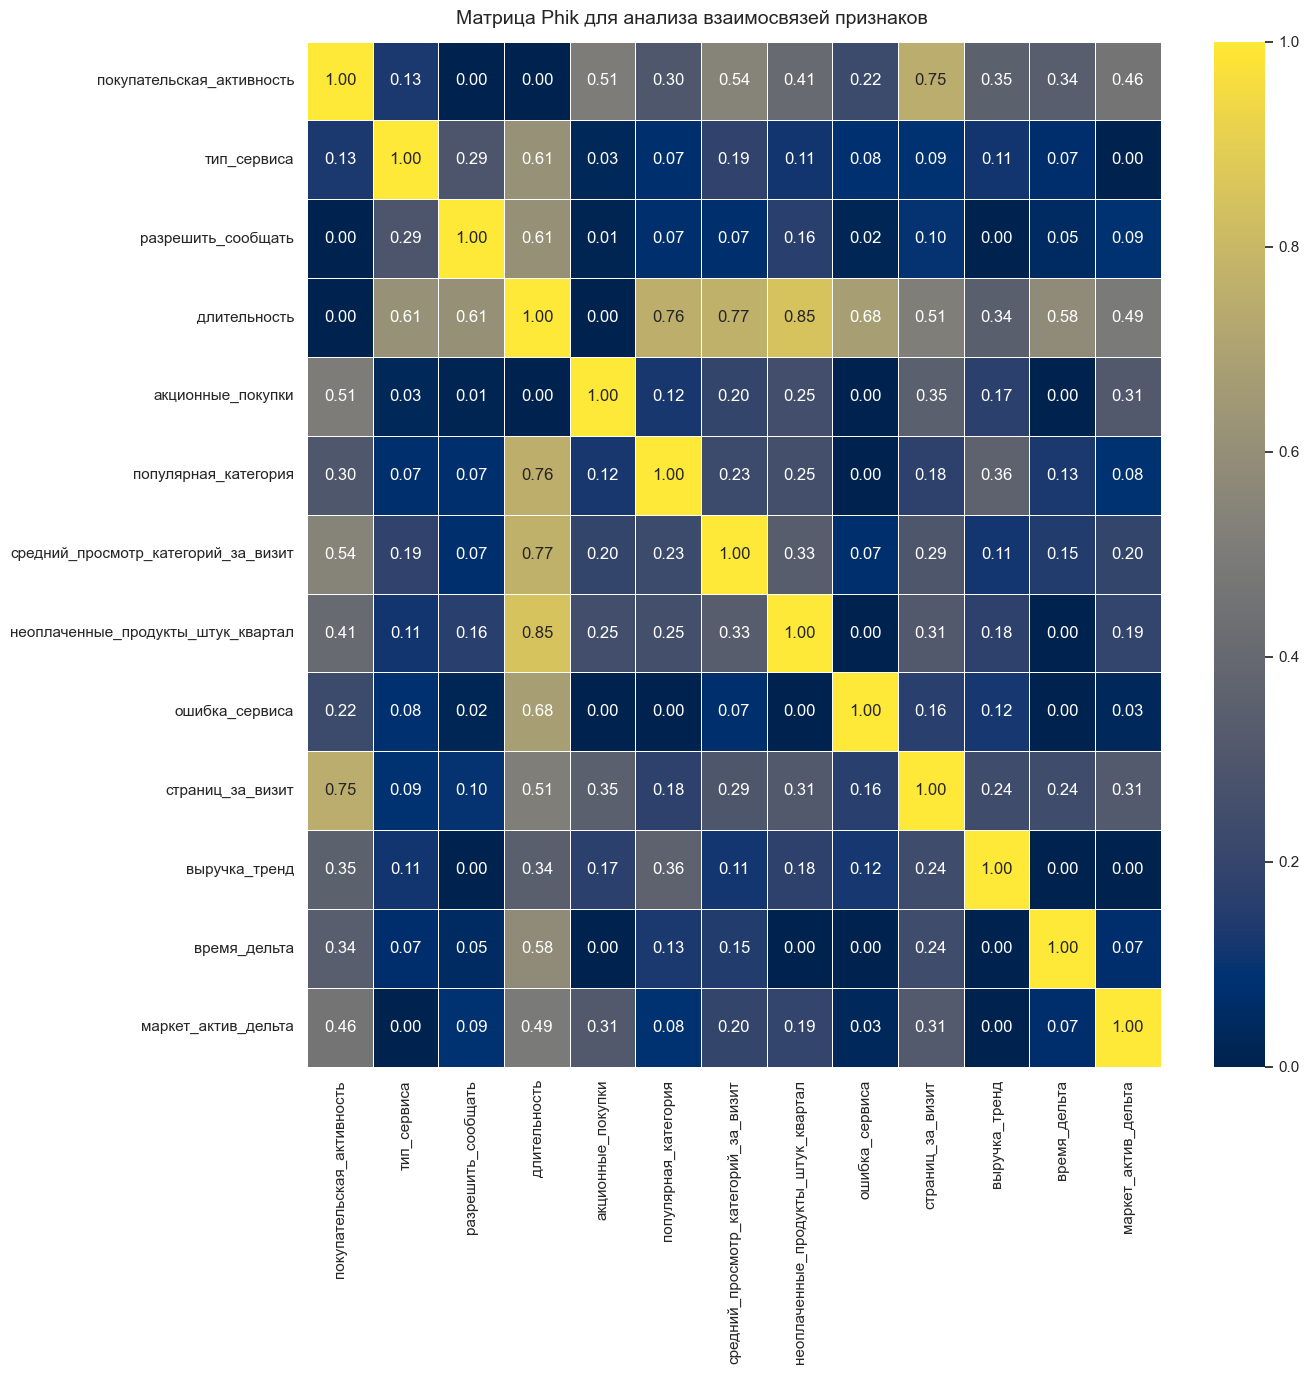

In [71]:
# Убираем столбцы, которые мы преобразовали
df_main_new = df_main.drop(columns=filter_col)

# Список с непрервными количественными значениями
interval_cols = ['маркет_актив_дельта', 
                 'выручка_тренд', 
                 'акционные_покупки']

# Строим тепловую карту
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df_main_new.phik_matrix(interval_cols=interval_cols), annot=True, 
            fmt='.2f', linewidths=.5, cmap='cividis', ax=ax)

# Настройка заголовка и подписей
f.suptitle('Матрица Phik для анализа взаимосвязей признаков', fontsize=14)

# Отображаем график
plt.tight_layout()
plt.show()

Так как мы видим нулевую корреляцию признаков **"разрешить сообщать"** и **длительность** с целевым, следовательно они будут излишни, для построения модели, удалим их, более того признак **длительность** сильно коррелирован с многими признаками.

In [72]:
drop_feature = ['длительность', 'разрешить_сообщать']

df_main_new.drop(drop_feature, axis=1, inplace=True)

Повторно строим матрицу **Phik** для проверки корреляций.

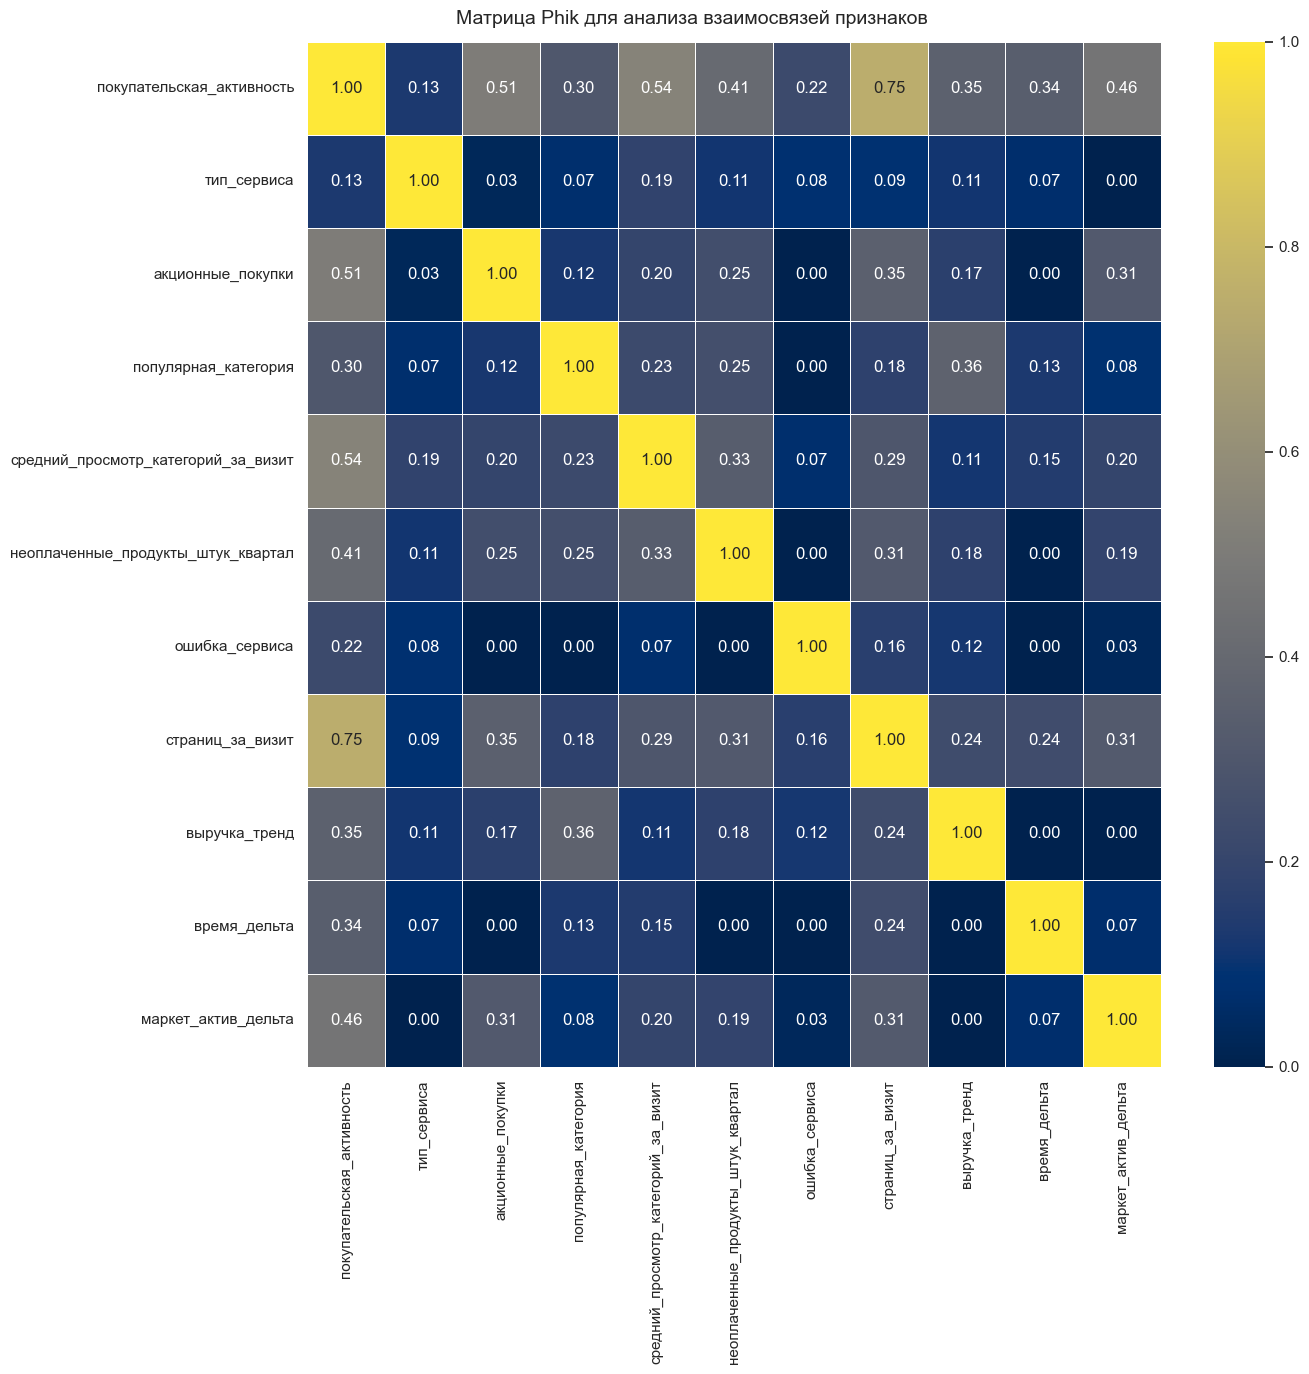

In [73]:
# Строим тепловую карту
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df_main_new.phik_matrix(interval_cols=interval_cols), annot=True, 
            fmt='.2f', linewidths=.5, cmap='cividis', ax=ax)

# Настройка заголовка и подписей
f.suptitle('Матрица Phik для анализа взаимосвязей признаков', fontsize=14)

# Отображаем график
plt.tight_layout()
plt.show()

### Вывод:

#### Мультиколениарность между признаками:

**Корреляция Пирсона:**

С помощью корреляции Пирсона мы выявили сильную линейную зависимость между значениями выручки за разные месяцы, данную мультиколлениарность мы исправили путем преобразования признаков в дельты между месяцами, тем самым сохранив иноформацию о динамике и упрастив количество признаков на единицу.

Остальные признаки показывают между собой слабую и в некоторых парах умеренную зависимость, что может хорошо сказаться на обучении моделей.

**VIF-фактор:**

С помощью этого метода мы обнаружили мультиколлениарность или нелинейную зависимость между парами признаков:

* **"маркет_актив_6_мес"** и **"маркет_актив_тек_мес"**
* **"время_предыдущий_месяц"** и **"время_текущий_месяц"**

В первом и втором случае так же было решено посчитать дельту между этими признаками, в первом случае мы получаем уровень маркетинговой коммуникации (выше/ниже/тот же относительно среднего), во втором случае мы как и ранее с выручкой получили динамику, как изменилось время проведенного на сайте каждого покупателя.

Таким образом у нас получилось изибавиться от мультиколлениарности путем преобразования признаков и сокращением их количества.

#### Корреляция с целевым признаком:

Благодаря построенной матрице Phik было выявлены следующая корреляция с целевым признаком: **"покупательская активность"**

**Нулевая зависимость:**

* "разрешить_сообщать" - **0.0** - можно ли присылать покупателю дополнительные предложения о товаре.
* "длительность" - **0.0** - сколько дней прошло с момента регистрации покупателя на сайте.

**Слабая зависимость:**

* "тип_сервиса" - **0.13** - уровень сервиса («премиум» и «стандарт»).
* "ошибка_сервиса" - **0.22** - число сбоев во время посещения сайта покупателем.

**Умеренная зависимость:**

* "популярная_категория" - **0.3** - самая популярная категория товаров у покупателя за последние 6 месяцев.
* "время_дельта" - **0.34** - дельта времени проведенного на сайте покупателем текущего и предыдущего месяцев.
* "выручка_тренд" - **0.35** - тренд выручки за 3 последний месяца.
* "неоплаченные_продукты_штук_квартал" - **0.41** - общее число неоплаченных товаров в корзине за последние 3 месяца.
* "маркет_актив_дельта" - **0.46** - уровень маркетинговой коммуникации с покупателем в текущем месяце (выше/ниже/тот же относительно среднего).

**Заметная зависимость:**

* "акционные_покупки" - **0.51** - среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
* "средний_просмотр_категорий_за_визит" - **0.54** - сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.

**Высокая зависимость:**

* "страниц_за_визит" - **0.75** - среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

#### Корреляция между остальными входными признаками:

Между остальными признаками наблюдается в основном слабая или умеренная корреляция.

## Подбор и обучение наилучшей модели:

### Деление датафрейма:

In [74]:
# Входные признаки
X = df_main_new.drop('покупательская_активность', axis=1)
# Целевой признак
y = df_main_new['покупательская_активность']

In [75]:
# Кодирование целевого признака
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [76]:
# Проверяем кодировку
encoder.transform(['снизилась', 'прежний_уровень'])

array([1, 0])

Таким образом мы получились следующую кодировку целевого признака:

* **0** - "прежний уровень".
* **1** - "снизилась".

In [77]:
# Деление датафрейма на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.25, 
    random_state=RANDOM_STATE, 
    stratify=y
)

In [78]:
# Проверяем размеры выборок
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (972, 10)
X_test: (324, 10)
y_train: (972,)
y_test: (324,)


Выборки разделены корректно, можем двигаться дальше.

### Списки признаков:

In [79]:
ohe_col_names = ['популярная_категория']
ord_col_names = ['тип_сервиса']
num_col_names = X.select_dtypes(include='number').columns.tolist()

### Создание пайплайнов:

#### OHE-кодирование категориальных признаков:

In [80]:
'''
SimpleImputer + OHE

1. simpleImputer_ohe - если в данных есть пропуски, заполняем 
их самым часто встречающимся значением с помощью SimpleImputer.

2. ohe - кодируем данные с помощью OneHotEncoder.
'''

ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, 
                                            strategy='most_frequent')), 
        
        ('ohe', OneHotEncoder(drop='first',
                              handle_unknown='ignore', 
                              sparse_output=False))
    ])

#### Ordinal-кодирование категориальных признаков:

In [81]:
'''
SimpleImputer + ORD + SimpleImputer

1. simpleImputer_before_ord - заполняем пропуски самым часто
встречающимся значением с помощью SimpleImputer.

2. ord - кодируем данные с помощью OrdinalEncoder.

3. simpleImputer_after_ord - заполняем пропуски, которые
появились после Ordinal-кодирования.
'''

ord_pipe = Pipeline(
    [
        ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, 
                                                   strategy='most_frequent')), 
        
        ('ord', OrdinalEncoder(categories=[['стандарт', 'премиум']], 
                               handle_unknown='use_encoded_value', 
                               unknown_value=np.nan)), 

        ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, 
                                                   strategy='most_frequent'))
    ])

#### Объединение этапов подготовки данных:

In [82]:
'''
Объединение этапов подготовки данных.

1. ohe - кодируем данные "ohe_col_names" с помощью пайплайна "ohe_pipe".

2. ord - кодируем данные "ord_col_names" с помощью пайплайна "ord_pipe".

3. num - полиномизируем и масштабируем данные "num_col_names" 
с помощью пайплайна "num_pipe".
'''

data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_col_names),
        ('ord', ord_pipe, ord_col_names),
        ('num', StandardScaler(), num_col_names)
    ],  remainder='passthrough', 
        force_int_remainder_cols=False)

#### Итоговый пайплайн:

In [83]:
'''
data_preprocessor + select_feature + models

1. preprocessor - подготовка данных c помощью data_preprocessor.

2. models - инициализация модели.
'''

pipe_final = Pipeline(
    [
     ('preprocessor', data_preprocessor), 
     ('models', LogisticRegression(random_state=RANDOM_STATE))
    ])

### Подбор модели и гиперпараметров:

**Выбор метрики для задачи:**

Метрику в данном поиске мы будем использовать **ROC-AUC**, так как у нас есть дисбаланс классов в целевойм признаке (**2:3**), несмотря на то, что при делении выборки я использую стратификацию, в жизни ее мы вряд ли же будем получать в таком же соотношении, а скорее всего она будет меняться, так как мы планируем предпринимать действия для его изменения, а именно снижая количество покупателей, чья активность снижается. Таким образомнаша метрика:

* Устойчива к дисбалансу классов.
* Поможет объективно сравнивать разные модели.

####  Подбор модели и ее гиперпараметров:

Напишем словарь для подбора медели и ее гиперпараметров, для модели **SVC** будет несколько словарей, чтобы минимизировать количество комбинаций, а так же добавим **DummyClassifier**, для сравнения других моделей с ней, как базовой.

In [84]:
# Словарь для подбора гиперпараметров
param_grid = [
    {
        'models': [LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)], 
        'models__C':[0.1, 1, 10, 100],   
        'preprocessor__num': [StandardScaler(), 
                              MinMaxScaler()]
    }, 
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)], 
        'models__min_samples_leaf': range(3, 10, 2), 
        'models__max_depth': range(2, 11), 
        'preprocessor__num': [StandardScaler(), 
                              'passthrough']
    }, 
    {
        'models': [KNeighborsClassifier()], 
        'models__n_neighbors': range(3, 20, 2), 
        'preprocessor__num': [StandardScaler(), 
                              MinMaxScaler(),
                              'passthrough']
    }, 
    {
        'models': [SVC(kernel='linear', probability=True, random_state=RANDOM_STATE)], 
        'models__C': [0.1, 1, 10, 100],
        'preprocessor__num': [StandardScaler(), 
                              MinMaxScaler()]
    }, 
    {
        'models': [SVC(probability=True, random_state=RANDOM_STATE)],
        'models__kernel': ['rbf', 'sigmoid', 'poly'], 
        'models__C': [0.1, 1, 10, 100],
        'models__gamma': [0.1, 1, 10, 100], 
        'preprocessor__num': [StandardScaler(), 
                              MinMaxScaler()]
    }, 
    {
       'models': [DummyClassifier(strategy="most_frequent")], 
       'preprocessor__num': [StandardScaler(), 
                              MinMaxScaler(),
                              'passthrough'] 
    }
]

In [85]:
# Подбор лучших гиперпараметров
grid_search = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=4, 
    scoring='roc_auc',  
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['популярная_категория']),
                                                                        ('ord',
                                                                         Pip...
                                                MinMaxScaler()]},
                         {'models': [SVC(probability=True, random_state=77)],
                          'models__C': [0.1, 1, 10, 100],
                          'models__gamma': [0.1, 1, 10, 100],
                          'models__kernel': ['rbf', 'sigmoid', 'poly'],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler()]},
                         {'models': [DummyClassifier(strategy='most_frequent')],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']}],
             scoring='roc_auc')

In [86]:
# Выводим лучшие результаты
result_search = pd.DataFrame(grid_search.cv_results_)

result_search['model_type'] = result_search['param_models'].apply(lambda x: x.__class__.__name__)

best_rows = result_search.loc[
    result_search.groupby('model_type')['rank_test_score'].idxmin()]
best_rows

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_models,param_models__C,param_preprocessor__num,param_models__max_depth,param_models__min_samples_leaf,param_models__n_neighbors,param_models__gamma,param_models__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,model_type
38,0.009545,0.002833,0.005145,0.001329,DecisionTreeClassifier(random_state=77),NaN,StandardScaler(),5.0,9.0,NaN,NaN,NaN,"{'models': DecisionTreeClassifier(random_state=77), 'models__max_depth': 5, 'models__min_samples_leaf': 9, 'preprocessor__num': StandardScaler()}",0.837885,0.825233,0.877016,0.874676,0.853702,0.022606,63,DecisionTreeClassifier
211,0.007472,0.002108,0.002969,0.000448,DummyClassifier(strategy='most_frequent'),NaN,StandardScaler(),NaN,NaN,NaN,NaN,NaN,"{'models': DummyClassifier(strategy='most_frequent'), 'preprocessor__num': StandardScaler()}",0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,208,DummyClassifier
104,0.005764,0.003286,0.005997,0.003351,KNeighborsClassifier(),NaN,StandardScaler(),NaN,NaN,19.0,NaN,NaN,"{'models': KNeighborsClassifier(), 'models__n_neighbors': 19, 'preprocessor__num': StandardScaler()}",0.871756,0.894624,0.899007,0.913943,0.894832,0.015126,4,KNeighborsClassifier
3,0.012558,0.006175,0.002935,0.000352,"LogisticRegression(max_iter=1000, random_state=77)",1.0,MinMaxScaler(),NaN,NaN,NaN,NaN,NaN,"{'models': LogisticRegression(max_iter=1000, random_state=77), 'models__C': 1, 'preprocessor__num': MinMaxScaler()}",0.883226,0.883154,0.888713,0.910956,0.891512,0.011450,10,LogisticRegression
139,0.041991,0.008906,0.005907,0.000551,"SVC(probability=True, random_state=77)",1.0,StandardScaler(),NaN,NaN,NaN,0.1,rbf,"{'models': SVC(probability=True, random_state=77), 'models__C': 1, 'models__gamma': 0.1, 'models__kernel': 'rbf', 'preprocessor__num': StandardScaler()}",0.886380,0.894695,0.899726,0.917434,0.899559,0.011368,1,SVC


Модель **SVC** показала себя лучше всех, проверим ее на тестовых данных.

In [87]:
# Присвоим для удобства модели переменную
model = grid_search.best_estimator_

In [88]:
# Расчет метрик на тестовых данных
pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:, 1]
print('Значение метрики Accuracy:', accuracy_score(y_test, pred))
print('Значение метрики Precision:', precision_score(y_test, pred))
print('Значение метрики Recall:', recall_score(y_test, pred))
print('Значение метрики ROC-AUC:', roc_auc_score(y_test, pred_proba))

Значение метрики Accuracy: 0.8765432098765432
Значение метрики Precision: 0.9468085106382979
Значение метрики Recall: 0.717741935483871
Значение метрики ROC-AUC: 0.8948387096774193


Рассмотрим дополнительно матрицу ошибок.

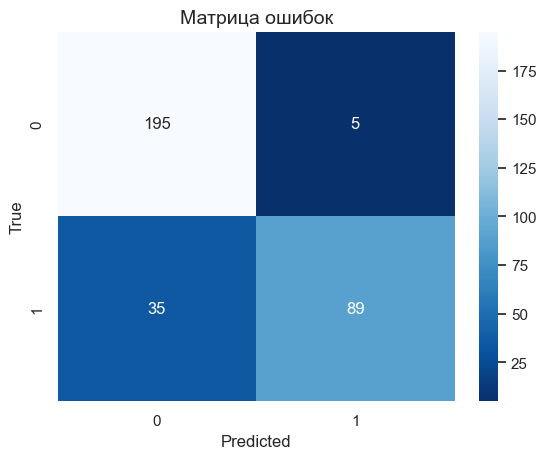

In [89]:
# Матрица ошибок
cm = confusion_matrix(y_test, pred)
matrix_plot = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')

# Настройка заголовка и подписей
plt.title('Матрица ошибок', fontsize=14)
plt.xlabel('Predicted')
plt.ylabel('True')
    
# Вывод результатов
plt.show()

Наша модель показывает себя гораздо лучше **DummyClassifier**, метрика на тестовых находится в пределах стандартного отклонения метрики на тренировочных данных, а значит модель работает стабильно и она не страдает переобучением. Так же при анализе матрицы ошибок мы видим, что модель очень хорошо предсказывает класс покупателей, чья активность **"снизилась"**. Выбор останавливаем на ней.

### Вывод:

Мы определили модель и ее гиперпараметры, которая лучше всего справляется с задачей - **SVC**.

**Параметры модели:**

* kernel - **rbf**
* C - **1**, 
* gamma - **0.1**
* Лучший метод масштабирования данных - **StandardScaler**

**Значения метрик:**

* Значение ROC-AUC на тренировочных данных - **0.9**
* Значение ROC-AUC на тестовых данных - **0.895**
* Значение Accuracy - **0.88**
* Значение Precision - **0.95**
* Значени Recall - **0.72**

Из результатов этих метрик мы можем сказать, что наша модель лучше определяет покупателей, чья активность **снизилась**, чем тех, у кого актиновность осталась на том же уровне.

## Анализ важности признаков методом SHAP:

### Расчет SHAP-значений:

In [90]:
# Подготавливаем данные
X_test_shap = model.named_steps['preprocessor'].transform(X_test)

# Выделяем модель
model_shap = model.named_steps['models']

In [91]:
explainer = shap.Explainer(
    model_shap.predict_proba,
    X_test_shap
)
shap_values = explainer(X_test_shap)

PermutationExplainer explainer: 325it [01:50,  2.70it/s]                        


### Построение графиков:

In [92]:
# Получаем названия признаков
feature_names = model.named_steps['preprocessor'].get_feature_names_out().tolist()
feature_names

['ohe__популярная_категория_косметика_и_аксессуары',
 'ohe__популярная_категория_кухонная_посуда',
 'ohe__популярная_категория_мелкая_бытовая_техника_и_электроника',
 'ohe__популярная_категория_техника_для_красоты_и_здоровья',
 'ohe__популярная_категория_товары_для_детей',
 'ord__тип_сервиса',
 'num__акционные_покупки',
 'num__средний_просмотр_категорий_за_визит',
 'num__неоплаченные_продукты_штук_квартал',
 'num__ошибка_сервиса',
 'num__страниц_за_визит',
 'num__выручка_тренд',
 'num__время_дельта',
 'num__маркет_актив_дельта']

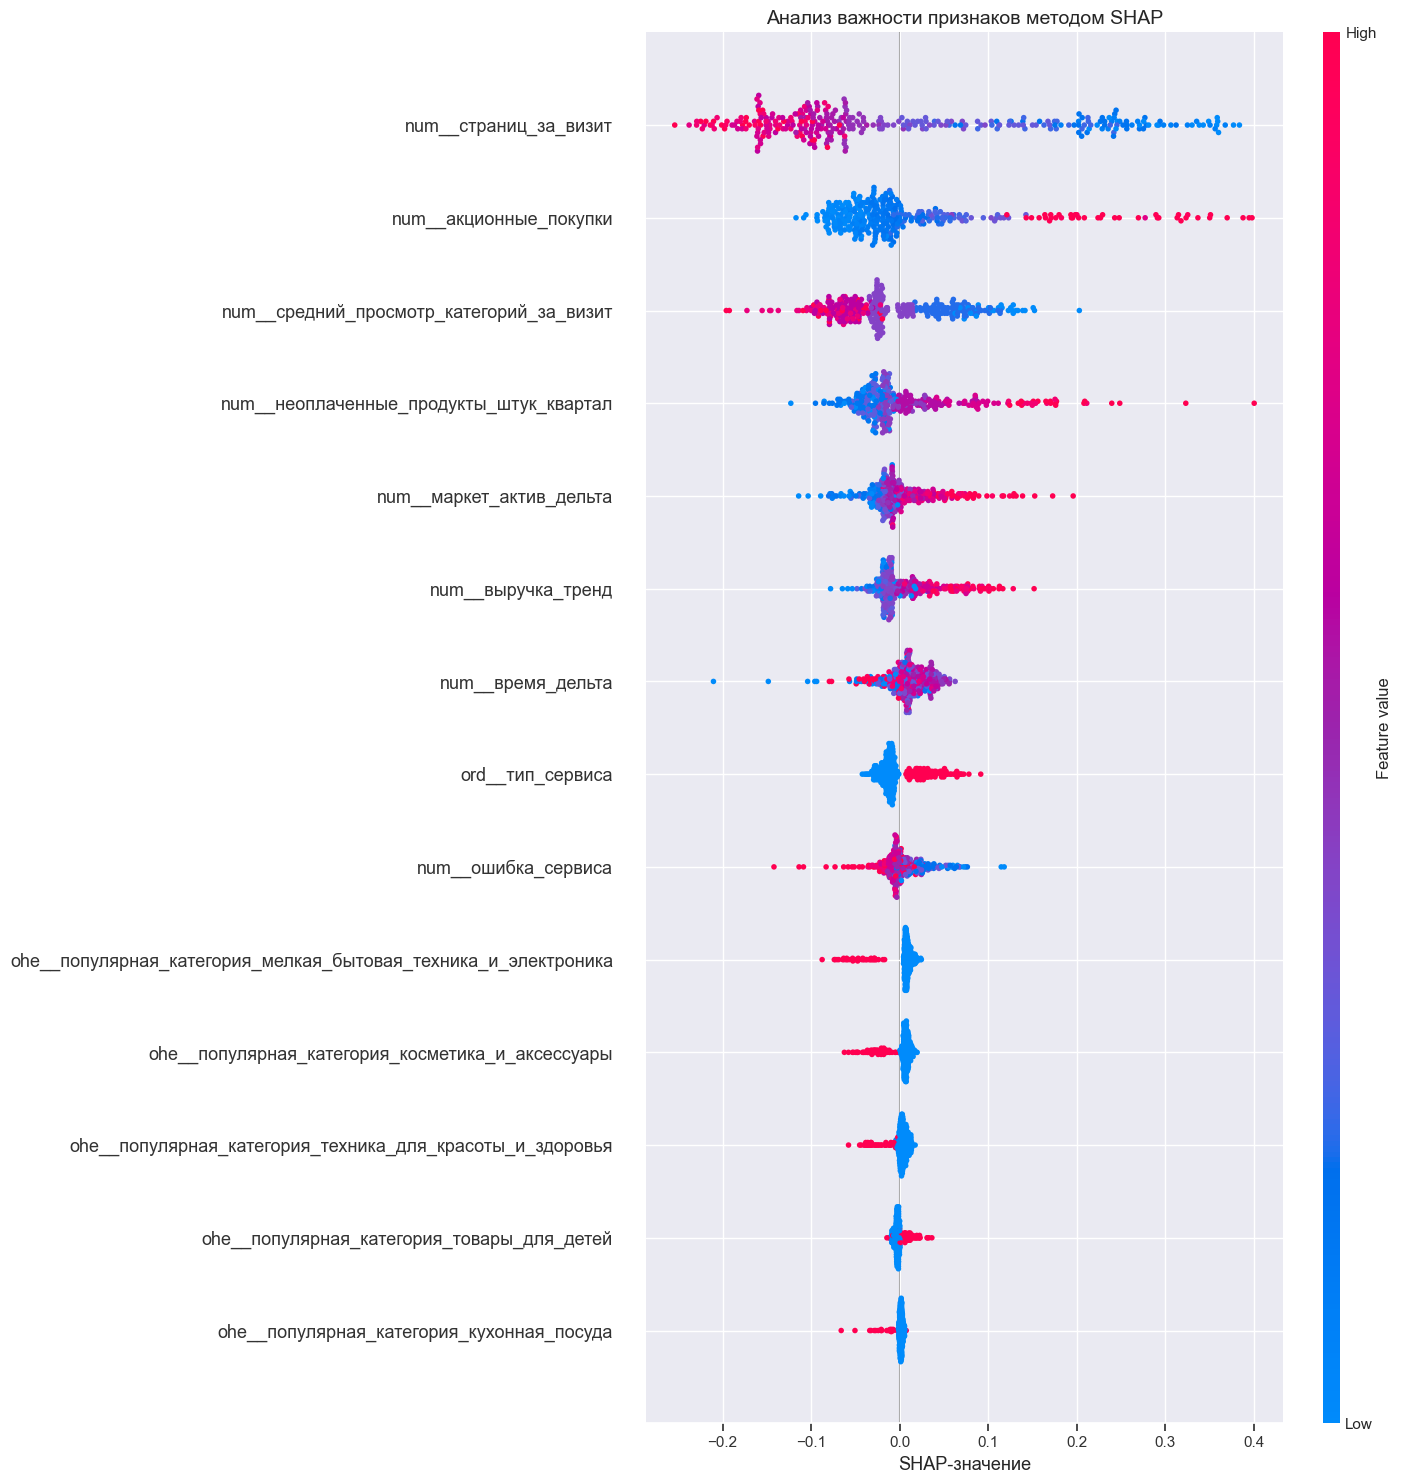

In [93]:
# Строим график важности признаков
shap.summary_plot(
    shap_values[:, :, 1], 
    X_test_shap, 
    rng=np.random.default_rng(42),
    feature_names=feature_names,
    show=False
)
# Получаем текущие оси
ax = plt.gca()

# Меняем размер графика
plt.gcf().set_size_inches(15, 15)

# Настройка заголовка и подписей
plt.title('Анализ важности признаков методом SHAP', fontsize=14)
plt.xlabel('SHAP-значение')

# Вывод графика
plt.tight_layout()
plt.show()

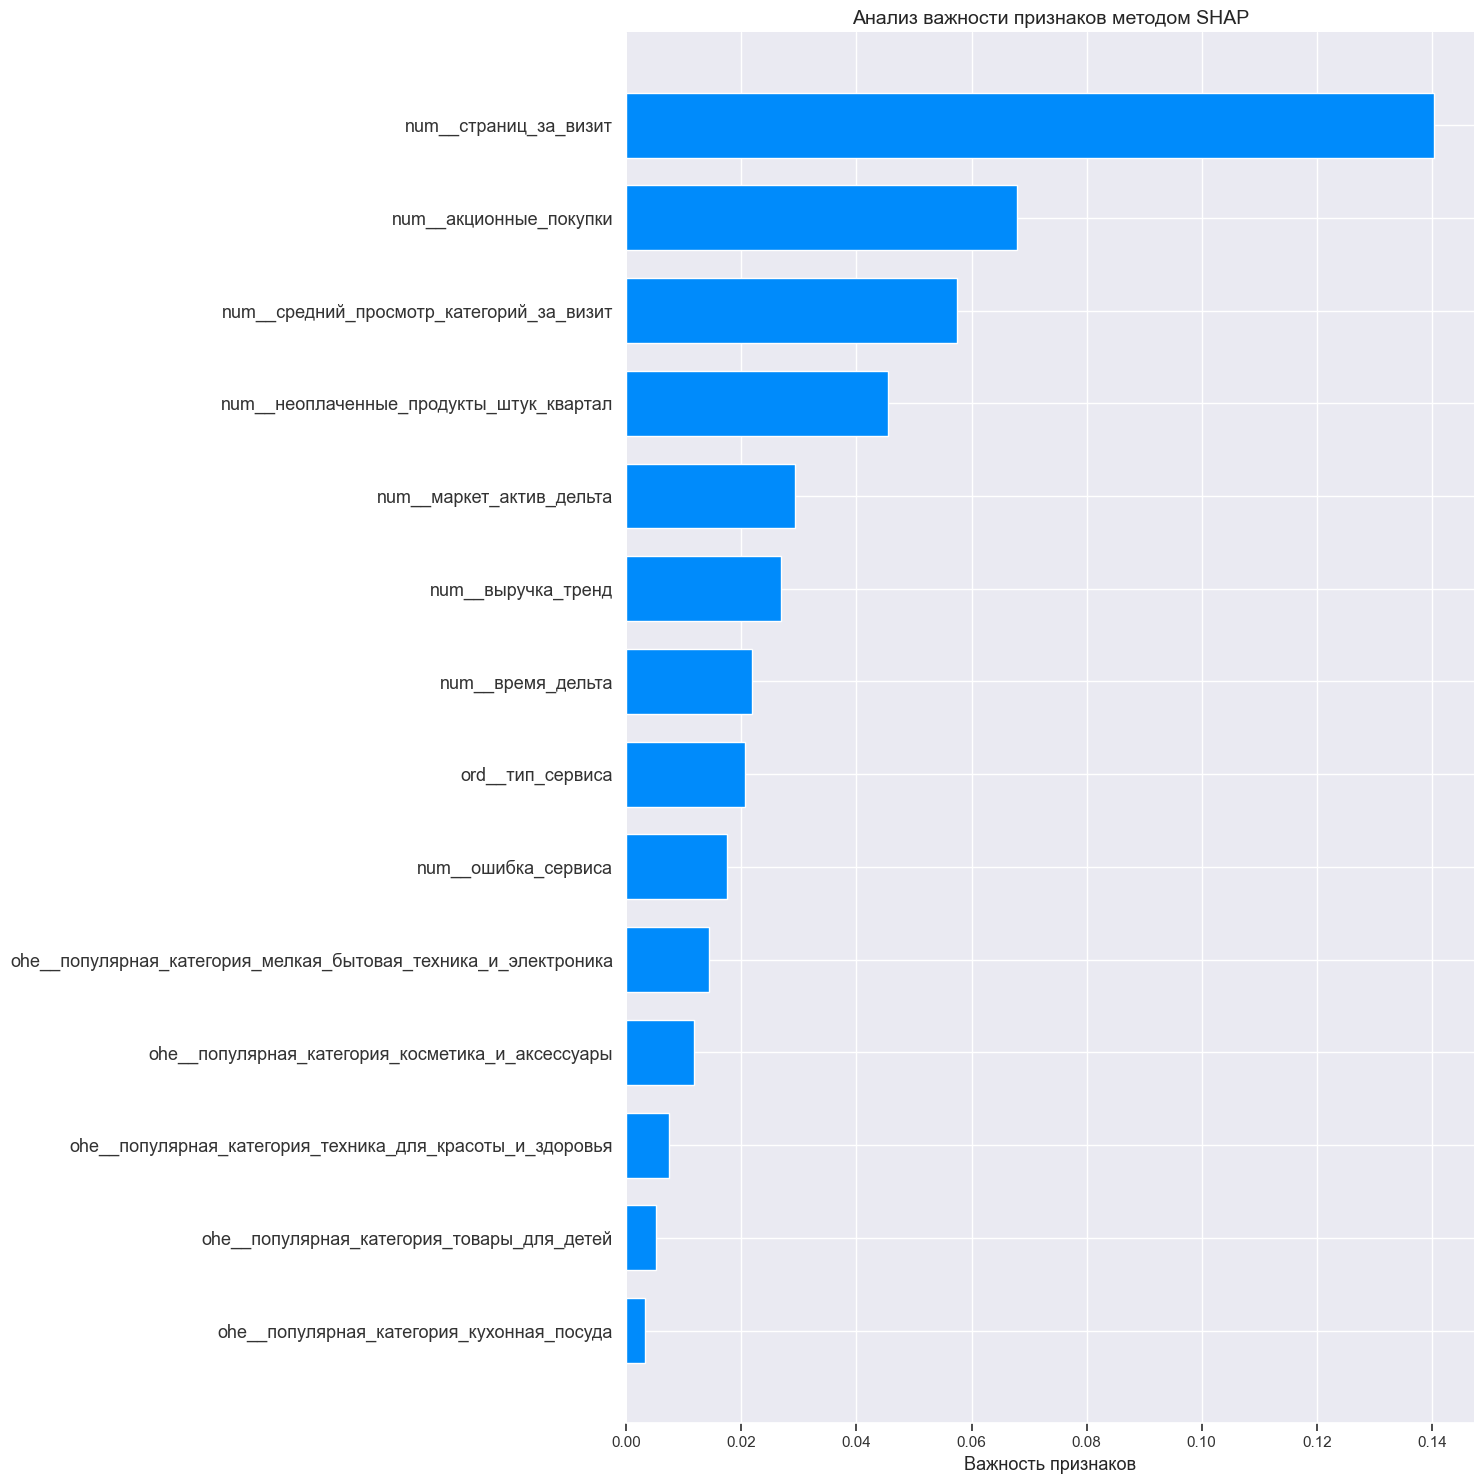

In [94]:
# Строим график важности признаков (столбчатый график)
shap.summary_plot(
    shap_values[:, :, 1], 
    X_test_shap, 
    plot_type='bar',
    rng=np.random.default_rng(42),
    feature_names=feature_names,
    show=False
)
# Получаем текущие оси
ax = plt.gca()

# Меняем размер графика
plt.gcf().set_size_inches(15, 15)

# Настройка заголовка и подписей
plt.title('Анализ важности признаков методом SHAP', fontsize=14)
plt.xlabel('Важность признаков')

# Вывод графика
plt.tight_layout()
plt.show()

### Вывод:

#### Мало значимые признаки для модели:

Данную категорию признаков мы можем определи по показателю **Важность признаков**, признаки, которые имеют этот показатель **менее 0.02** определяются, как **мало значимые**. Удаление таких признаков может улучшить ее качество.

**Мало значимые признаки:**

* ohe__популярная_категория_косметика_и_аксесуары
* ohe__популярная_категория_кухонная_посуда
* ohe__популярная_категория_мелкая_бытовая_техника_и_электроника
* ohe__популярная_категория_техника_для_красоты_и_здоровья
* ohe__популярная_категория_товары_для_детей
* num__ошибка_сервиса

#### Сильно значимые признаки для модели:

Признаки, которые уже вносят весомый вклад в работу модели можно определить оставшиеся, удаление таких признаков может ухудшить качество модели. Наиболее важные признаки:

**Сильно значимые признаки:**

* страниц_за_визит - **~0.14**
* num__акционные_покупки - **~0.07**
* num__средний_просмотр_категорий_за_визит - **~0.06**
* num__неоплаченные_продукты_штук_квартал - **~0.045**
* num__маркет_актив_дельта - **~0.03**
* num__выручка_тренд - **~0.025**
* num__время_дельта - **~0.02**
* ord__тип_сервиса - **~0.02**

#### Как можно использовать эти наблюдения при моделировании и принятии бизнес-решений.

**Использование этих данных при моделировании:**

Эти результаты мы можем использовать для улучшения качества модели, упростить ее или облегчить, чтобы она требовала меньше вычислительных мощностей. То есть, первым шагом мы можем попробовать удалить **мало значимые** признаки и посмотреть на результаты метрики, скорее всего она улучшиться, так как **мало значимые** признаки могут давать **шум** для модели и эти признаки могут только мешать принимать решение.

**Использование этих данных при бизнес-решениях:**

В этом случае мы наоборот больше используем информацию о **сильно значимых** признаках. Эта информация дает нам "ниточки" за которые бизнес может "тянуть" для достижения своих целей. Рассмотрим ситуацию на наших признаках:

Допустим мы наблюдаем снижение активности покупателя, мы можем рассмотреть его индивидуальный случай и понять что именно может послужить причиной, снижение активности мы наблюдаем по количеству просмотренных страниц за раз и количеству просмотренных категорий в среднем. Далее мы рассматриваем причины:

**Финансовые:**

* **Финансовые трудности** - у покупателя нет возможности приобретать товары, поэтому он рассматривает в основном акционные товары. **(num__акционные_покупки)**
* **Дорогие покупки** - покупатель недавно приобрел, что то дорогое, поэтому у него пока нет возможност что-то еще покупать. **(num__выручка_тренд)** В данном случае нужно более подробно рассматривать выручку по месяцам, но индикатором может служить резкие и сильные скачки в большую сторону.

**Эмоциональные:**

* **Раздражительность, усталость** - регулярные ошибки сервиса, излишне много маркетинговых уведомлений могут влиять эмоционально на человека и закреплять в нем негативных опыт. **(num__маркет_актив_дельта, num__ошибка_сервиса)**
* **Отсутствие выгоды** - покупатели с преимумом возможно имеют мало выгоды от своего типа сервиса, так как наличие его играет ровно в ту сторону, что снижается активность. **(ord__тип_сервиса)**

Проведя такой анализ можно построить некий план действий по снижению влияния негативных факторов и по усилению тех, которые влияют позитивно.

## Сегментация покупателей:

В данном разделе мы рассмотрим такой сегмент покупателей, как: **"Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью"**, так как потеря таких покупателей довольно болезненно скажется на прибыли компании.

### Добавление в таблицу значения прибыли и прогноза модели:

In [95]:
# Получаем прогноз модели
full_pred = model.predict(X)

# Получаем вероятности прогноза модели
full_pred_proba = model.predict_proba(X)[:, 1]

In [96]:
# Добавляем значения прибыли к общей таблице
X = X.join(df_money_mean)

# Добавляем в таблицу прогноз модели
X['прогноз_модели'] = encoder.inverse_transform(full_pred)

# Добавляем в таблицу вероятности прогноза модели
X['вероятность_класса'] = full_pred_proba

# Проверяем результат добавления новый колонок
X.head()

,тип_сервиса,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_тренд,время_дельта,маркет_актив_дельта,прибыль,прогноз_модели,вероятность_класса
215349,премиум,0.75,товары_для_детей,4,4,2,5,249.80,-2,-0.4,4.16,снизилась,0.975034
215350,стандарт,0.14,домашний_текстиль,5,2,1,5,116.20,5,-1.9,3.13,прежний_уровень,0.091122
215351,стандарт,0.99,товары_для_детей,5,0,6,4,908.70,2,1.8,4.87,снизилась,0.906482
215352,стандарт,0.94,товары_для_детей,3,2,3,2,639.25,3,-2.1,4.21,снизилась,0.964730
215353,стандарт,0.26,домашний_текстиль,4,1,1,4,132.25,0,0.7,3.95,снизилась,0.784020


### Исследование сегмента покупателей:

#### Выделение сегмента покупателей:

Определим значения - что такое высокая прибыльность.

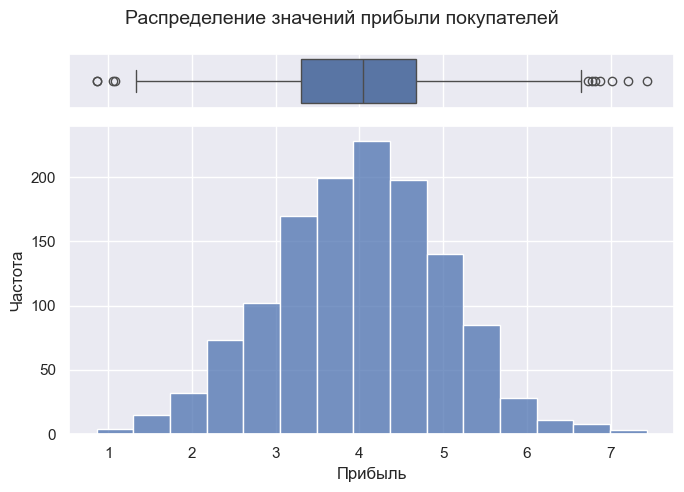

count    1296.000000
mean        3.997701
std         1.011198
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 0.5973632120299044
Критические значения: [0.574 0.654 0.785 0.915 1.089]
Распределение нормальное.


In [97]:
analyzis_quantity(X['прибыль'], 
                  name='Распределение значений прибыли покупателей', 
                  x_label='Прибыль')

К значениям высокой прибыльности мы можем определить диапозон **от 75 процентиля**, то есть средняя прибыль **от 4.67 тысяч рублей**.

Наиболее высокую вероятность снижения активности определим, как **0.7**, так же определям низкую вероятность снижения активности, как **0.3**, для того, чтобы мы могли сравнивать эти две группы, это нам поможет более явно увидеть, что для этой группы норма, а что может повлиять на снижение их активности.

Отфильтруем датафрейм по этим значениям.

In [98]:
# Выделяем интересущий нас сегмент покупателей
cust_segment = X.query('прибыль >= 4.67 & (вероятность_класса <=0.3 | вероятность_класса >=0.7)')

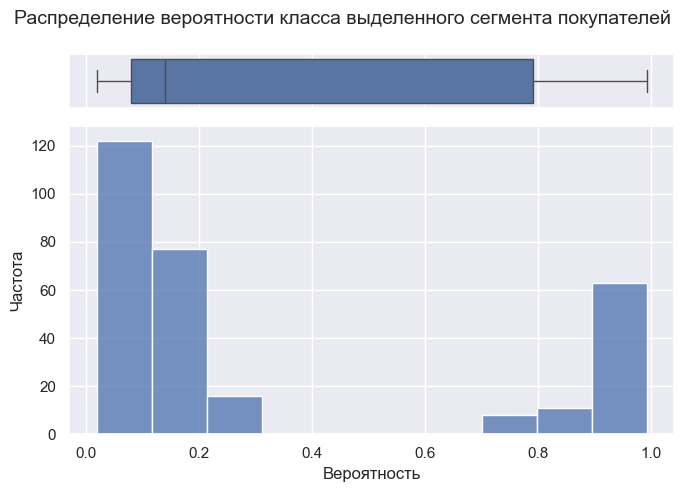

count    297.000000
mean       0.337955
std        0.367371
min        0.018995
25%        0.080044
50%        0.139213
75%        0.791433
max        0.992511
Name: вероятность_класса, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 42.77785003706356
Критические значения: [0.569 0.647 0.777 0.906 1.078]
Распределение не является нормальным.


In [99]:
# Проверим верность получения необходимых нам сегментов
analyzis_quantity(cust_segment['вероятность_класса'], 
                  name='Распределение вероятности класса выделенного сегмента покупателей', 
                  x_label='Вероятность', 
                  num=10)

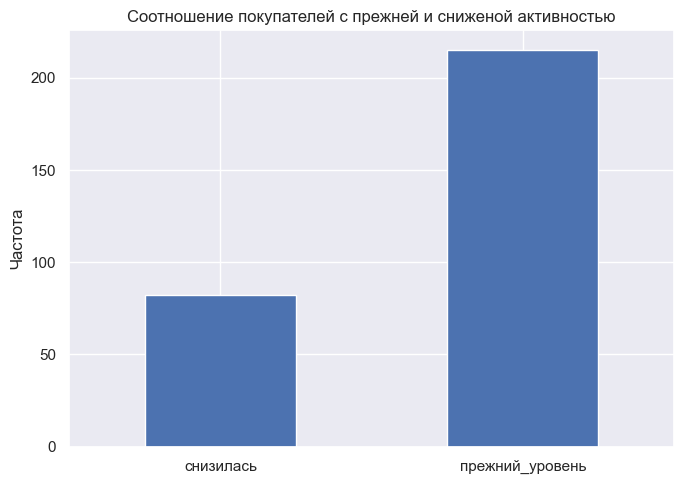

прогноз_модели
снизилась           82
прежний_уровень    215
Name: count, dtype: int64


In [100]:
analyzis_category(cust_segment['прогноз_модели'], 
                  name='Соотношение покупателей с прежней и сниженой активностью')

Мы верно разделили наш сегмент по вероятностям и определили, что в нашей выборке с прежней активностью **215** покупателей, а с сниженной активностью **82**.

#### Графическое аналитическое исследование сегмента покупателей:

В этот раз мы будем рассматривать признаки в перемешку (количественные/категориальные), чтобы постепенно уточнять этот портрет, начиная с широких "мазков".

**Тип сервиса:**

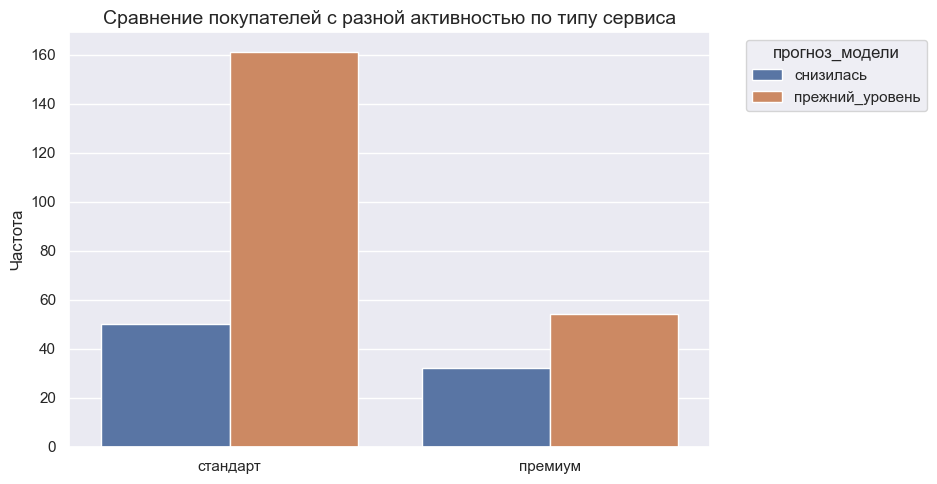

тип_сервиса      премиум  стандарт
прогноз_модели                    
прежний_уровень       54       161
снизилась             32        50


In [101]:
analyzis_group_cat(data=cust_segment, 
                   x='тип_сервиса', 
                   hue='прогноз_модели', 
                   name='Сравнение покупателей с разной активностью по типу сервиса')

**Активность на прежнем уровне:**

Видим соотношение стандарт и премиум **3:1** соответственно.

**Активность снизилась:**

Видим соотношение стандарт и премиум **5:3** соответственно.

**Общее наблюдение:**

Соотношение сильно разнится, но в целом тенденция та же, что покупателей с типом сервиса стандарт больше.

**Популярная категория:**

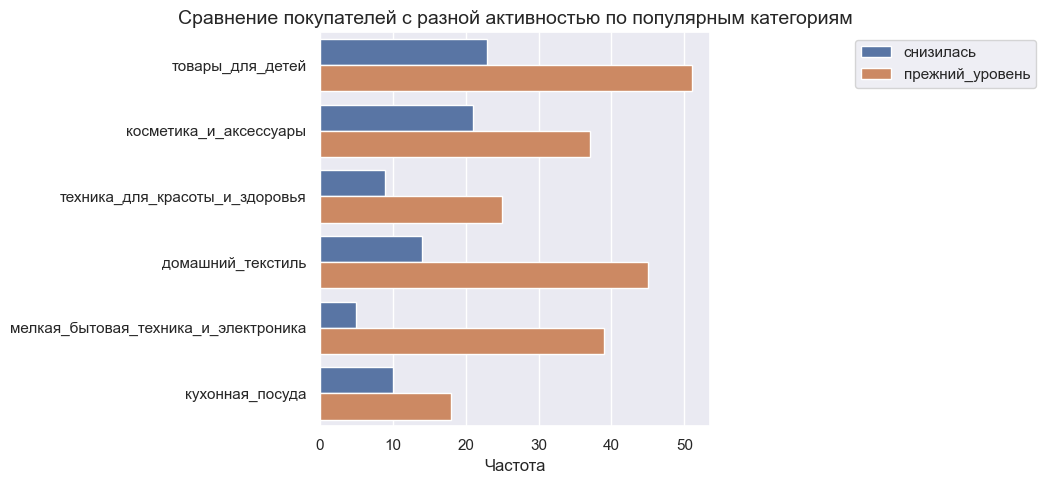

популярная_категория  домашний_текстиль  косметика_и_аксессуары  \
прогноз_модели                                                    
прежний_уровень                      45                      37   
снизилась                            14                      21   

популярная_категория  кухонная_посуда  мелкая_бытовая_техника_и_электроника  \
прогноз_модели                                                                
прежний_уровень                    18                                    39   
снизилась                          10                                     5   

популярная_категория  техника_для_красоты_и_здоровья  товары_для_детей  
прогноз_модели                                                          
прежний_уровень                                   25                51  
снизилась                                          9                23  


In [102]:
analyzis_group_cat(data=cust_segment, 
                   x='популярная_категория', 
                   hue='прогноз_модели', 
                   name='Сравнение покупателей с разной активностью по популярным категориям', 
                   orient='h')

**Активность на прежнем уровне:**

* Товары для детей                     - **51**
* Домашний текстиль                    - **45**
* Косметика и аксессуары               - **37**
* Мелкая бытовая техника и электроника - **39**
* Техника для красоты и здоровья       - **25**
* Кухонная посуда                      - **18**

**Активность снизилась:**

* Товары для детей                     - **23**
* Косметика и аксессуары               - **21**
* Домашний текстиль                    - **14**
* Кухонная посуда                      - **10**
* Техника для красоты и здоровья       - **9**
* Мелкая бытовая техника и электроника - **5**

**Общее наблюдение:**

Сегмент, чья активность снизилась покупает меньше техники и электроники, особенно это выражено на мелкой бытовой техники и электроники.

**Средний просмотр категорий за визит:**

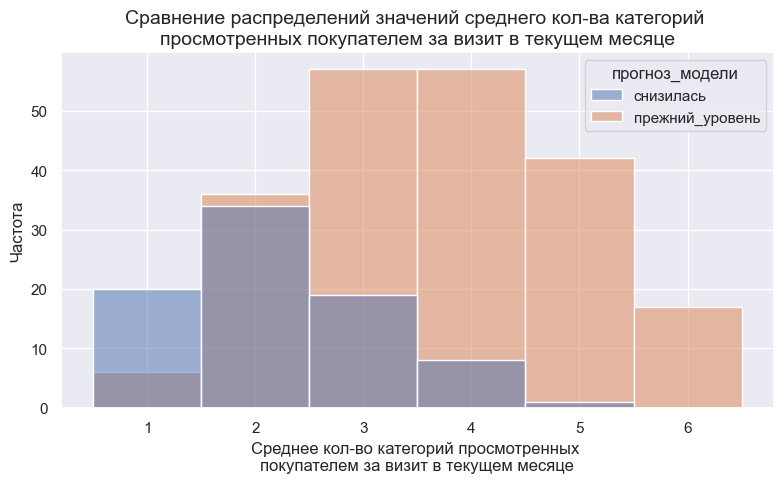

Прежний уровень
----------------
count    215.000000
mean       3.669767
std        1.263346
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        6.000000
Name: средний_просмотр_категорий_за_визит, dtype: float64

Снизилась
----------------
count    82.000000
mean      2.219512
std       0.968955
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       5.000000
Name: средний_просмотр_категорий_за_визит, dtype: float64


In [103]:
analyzis_group_quant(
    data=cust_segment, 
    x='средний_просмотр_категорий_за_визит', 
    name='Сравнение распределений значений среднего кол-ва категорий \nпросмотренных покупателем за визит в текущем месяце', 
    hue='прогноз_модели', 
    x_label='Cреднее кол-во категорий просмотренных \nпокупателем за визит в текущем месяце', 
    discrete=True)

**Общее наблюдение:**

У сегмента с сниженной активностью медианное значение смещено влево, оно снижено **с 4 до 2** просмотренных категорий за визит.

**Страниц за визит:**

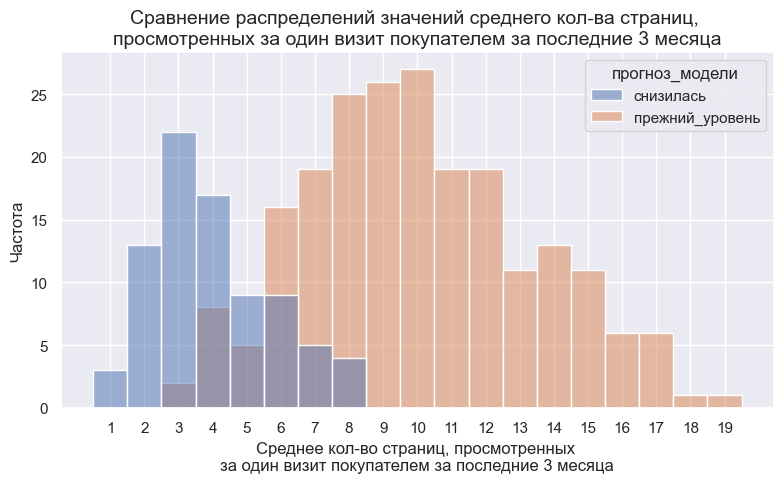

Прежний уровень
----------------
count    215.000000
mean      10.037209
std        3.345874
min        3.000000
25%        8.000000
50%       10.000000
75%       12.000000
max       19.000000
Name: страниц_за_визит, dtype: float64

Снизилась
----------------
count    82.000000
mean      4.012195
std       1.774260
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       8.000000
Name: страниц_за_визит, dtype: float64


In [104]:
analyzis_group_quant(
    data=cust_segment, 
    x='страниц_за_визит', 
    name='Сравнение распределений значений среднего кол-ва страниц, \nпросмотренных за один визит покупателем за последние 3 месяца', 
    hue='прогноз_модели', 
    x_label='Cреднее кол-во страниц, просмотренных \nза один визит покупателем за последние 3 месяца', 
    discrete=True)

**Общее наблюдение:**

У исследуемого сегмента диапозон значений просмотренных страниц снизился в **2 раза**, пик назодится на значении **3**, когда как при прежнем уровне активности это значение около **10**.

**Время дельта:**

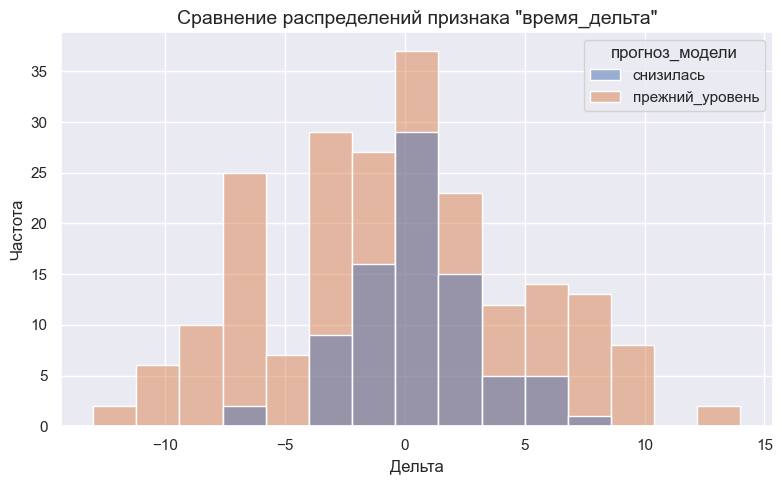

Прежний уровень
----------------
count    215.00000
mean      -0.47907
std        5.16171
min      -13.00000
25%       -4.00000
50%        0.00000
75%        3.00000
max       14.00000
Name: время_дельта, dtype: float64

Снизилась
----------------
count    82.000000
mean      0.402439
std       2.675263
min      -6.000000
25%      -1.750000
50%       0.500000
75%       2.000000
max       7.000000
Name: время_дельта, dtype: float64


In [105]:
analyzis_group_quant(data=cust_segment, 
                     x='время_дельта', 
                     name='Сравнение распределений признака "время_дельта"', 
                     hue='прогноз_модели', 
                     x_label='Дельта')

**Общее наблюдение:**

Дельта времени проведенном на сайте находится в более узком диапозоне, чем у покупателей с прежней активностью, и так же оно распрделено около нуля, то есть время проведенное на сайте у них не изменилось.

**Акционные покупки:**

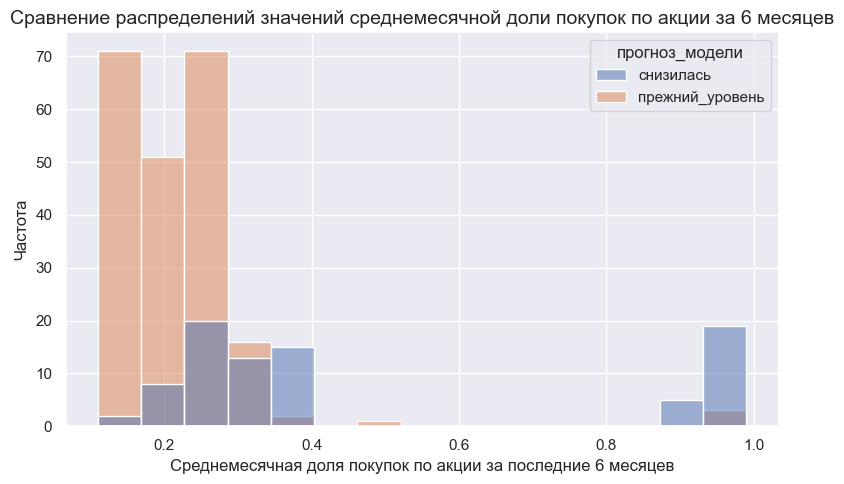

Прежний уровень
----------------
count    215.000000
mean       0.216047
std        0.106713
min        0.110000
25%        0.155000
50%        0.210000
75%        0.250000
max        0.950000
Name: акционные_покупки, dtype: float64

Снизилась
----------------
count    82.000000
mean      0.481585
std       0.307625
min       0.120000
25%       0.250000
50%       0.320000
75%       0.890000
max       0.990000
Name: акционные_покупки, dtype: float64


In [106]:
analyzis_group_quant(data=cust_segment, 
                     x='акционные_покупки', 
                     name='Сравнение распределений значений среднемесячной доли покупок по акции за 6 месяцев', 
                     hue='прогноз_модели', 
                     x_label='Среднемесячная доля покупок по акции за последние 6 месяцев')

**Общее наблюдение:**

Покупатели с сниженной активностью покупают товары по акции больше, чем с прежней активностью.

**Неоплаченные продукты штук квартал:**

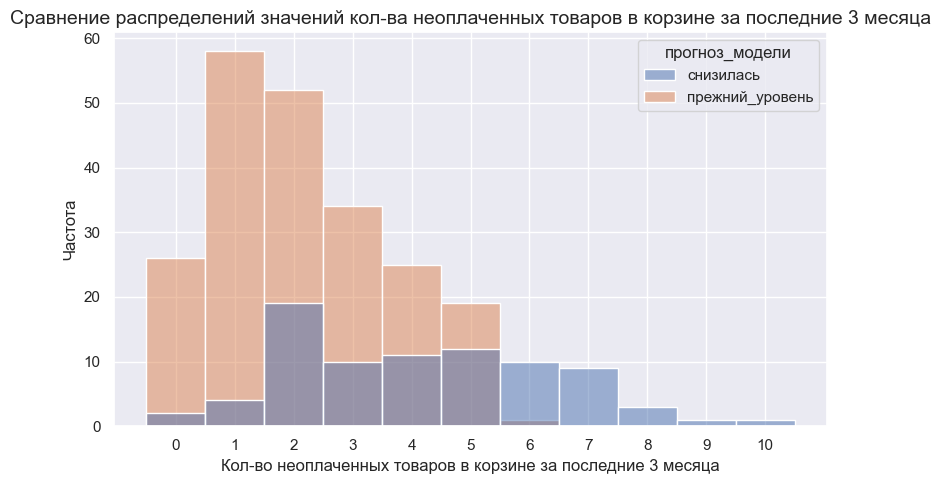

Прежний уровень
----------------
count    215.000000
mean       2.162791
std        1.493447
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64

Снизилась
----------------
count    82.000000
mean      4.170732
std       2.204400
min       0.000000
25%       2.000000
50%       4.000000
75%       6.000000
max      10.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64


In [107]:
analyzis_group_quant(data=cust_segment, 
                     x='неоплаченные_продукты_штук_квартал', 
                     name='Сравнение распределений значений кол-ва неоплаченных товаров в корзине за последние 3 месяца', 
                     hue='прогноз_модели', 
                     x_label='Кол-во неоплаченных товаров в корзине за последние 3 месяца', 
                     discrete=True)

**Общее наблюдение:**

У покупателей с сниженной активностью растет количество неоплаченных товаров, медианное значение выросло **с 2 до 4** штук.

**Выручка тренд:**

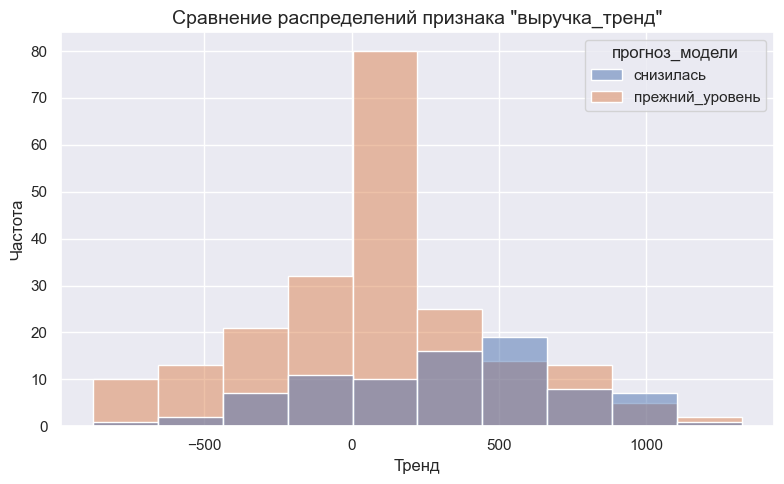

Прежний уровень
----------------
count     215.000000
mean       67.244651
std       403.191781
min      -877.200000
25%      -124.700000
50%        49.350000
75%       269.400000
max      1325.000000
Name: выручка_тренд, dtype: float64

Снизилась
----------------
count      82.000000
mean      339.314634
std       426.951308
min      -801.850000
25%        -1.237500
50%       413.600000
75%       641.325000
max      1289.350000
Name: выручка_тренд, dtype: float64


In [108]:
analyzis_group_quant(data=cust_segment, 
                     x='выручка_тренд', 
                     name='Сравнение распределений признака "выручка_тренд"', 
                     hue='прогноз_модели', 
                     x_label='Тренд', 
                     num=10)

**Общее наблюдение:**

Из результатов этого графика можно сделать вывод, что их траты на сайте за последние 3 месяца увелились, медианная этой выборки выше, **49** у покупателей с прежней активностью, **413** у тех, чья активность снизилась.

**Маркет актив дельта:**

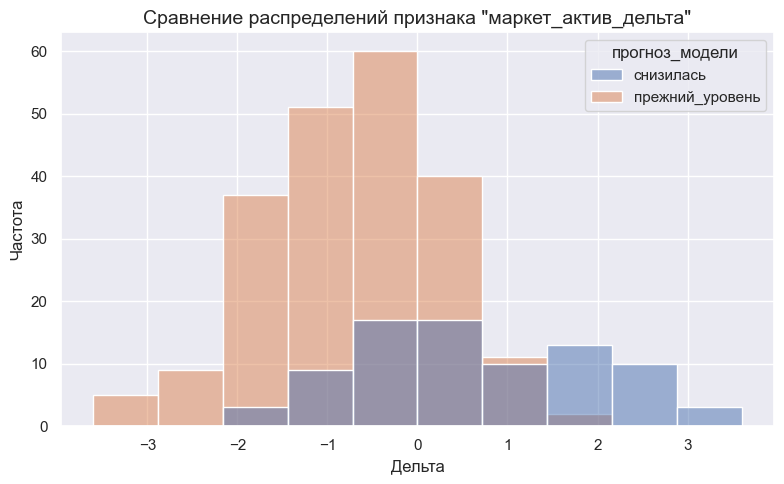

Прежний уровень
----------------
count    215.000000
mean      -0.726512
std        1.010457
min       -3.600000
25%       -1.400000
50%       -0.600000
75%       -0.100000
max        1.800000
Name: маркет_актив_дельта, dtype: float64

Снизилась
----------------
count    82.000000
mean      0.670732
std       1.259187
min      -1.800000
25%      -0.275000
50%       0.600000
75%       1.600000
max       3.600000
Name: маркет_актив_дельта, dtype: float64


In [109]:
analyzis_group_quant(data=cust_segment, 
                     x='маркет_актив_дельта', 
                     name='Сравнение распределений признака "маркет_актив_дельта"', 
                     hue='прогноз_модели', 
                     x_label='Дельта', 
                     num=10)

**Общее наблюдение:**

При сравнивании мы видим что на наш исследуемый сегмент было направленно больше маркетинговой активности, чем на остальных, при том что на остальных этот показатель наоборот снизился в текущий месяц по сравнению с средним уровнем.

**Ошибка сервиса:**

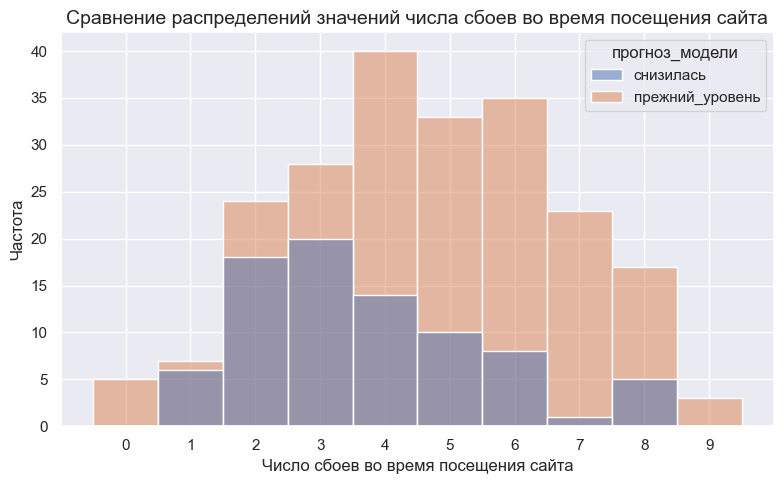

Прежний уровень
----------------
count    215.000000
mean       4.641860
std        2.056927
min        0.000000
25%        3.000000
50%        5.000000
75%        6.000000
max        9.000000
Name: ошибка_сервиса, dtype: float64

Снизилась
----------------
count    82.000000
mean      3.695122
std       1.823638
min       1.000000
25%       2.000000
50%       3.000000
75%       5.000000
max       8.000000
Name: ошибка_сервиса, dtype: float64


In [110]:
analyzis_group_quant(data=cust_segment, 
                     x='ошибка_сервиса', 
                     name='Сравнение распределений значений числа сбоев во время посещения сайта', 
                     hue='прогноз_модели', 
                     x_label='Число сбоев во время посещения сайта', 
                     discrete=True)

**Общее наблюдение:**

Число сбоев, с которым встречается сегмент с сниженной активностью покупателей ниже, чем у выборки с прежней активностью. Медианное значение уменьшиолось **с 5 до 3** ошибок.

#### Промежуточный вывод:

Мы наблюдаем, что исследуемый сегмент:

* Меньше просматривает страниц
* Меньше просматривает категорий
* Меньше покупает техники и электроники
* Времени на сайте он проводит столько же
* Больше покупает товаров со скидкой
* Больше неоплаченных товаров
* Тренд по выручке растет, он тратит больше, чем в более ранние месяцы
* На них было направленно больше маркетинговых коммуникаций, относительно остальных.

Из этих тезисов можно выдвинуть гипотезу, что повышенная маркетинговая активность, направленная на этот сегмент покупателей, заставила их больше потратить денег на сайте и накопить товары, которые хочется приобрести, но пока нет возможности, и видимо предложения были хорошо направлены на их потребности, что им не пришлось просматривать больше страниц. Изменение предпочтений в популярных категориях, возможно, так же было связано с маркетинговой стратегией, либо просто связано с личными предпочтениями выбранного сегмента.

Далее мы проверим эту гипотезу и посмотрим взаимосвязи маркетинговой активности с остальными признаками.

### Исследование взаимосвязи маркетинговой активности и остальных признаков:

In [111]:
# Выделяем признаки, где нам интересна связь с маркетинговой активностью
feature_segment = ['средний_просмотр_категорий_за_визит', 
                   'страниц_за_визит', 
                   'акционные_покупки', 
                   'неоплаченные_продукты_штук_квартал', 
                   'выручка_тренд']

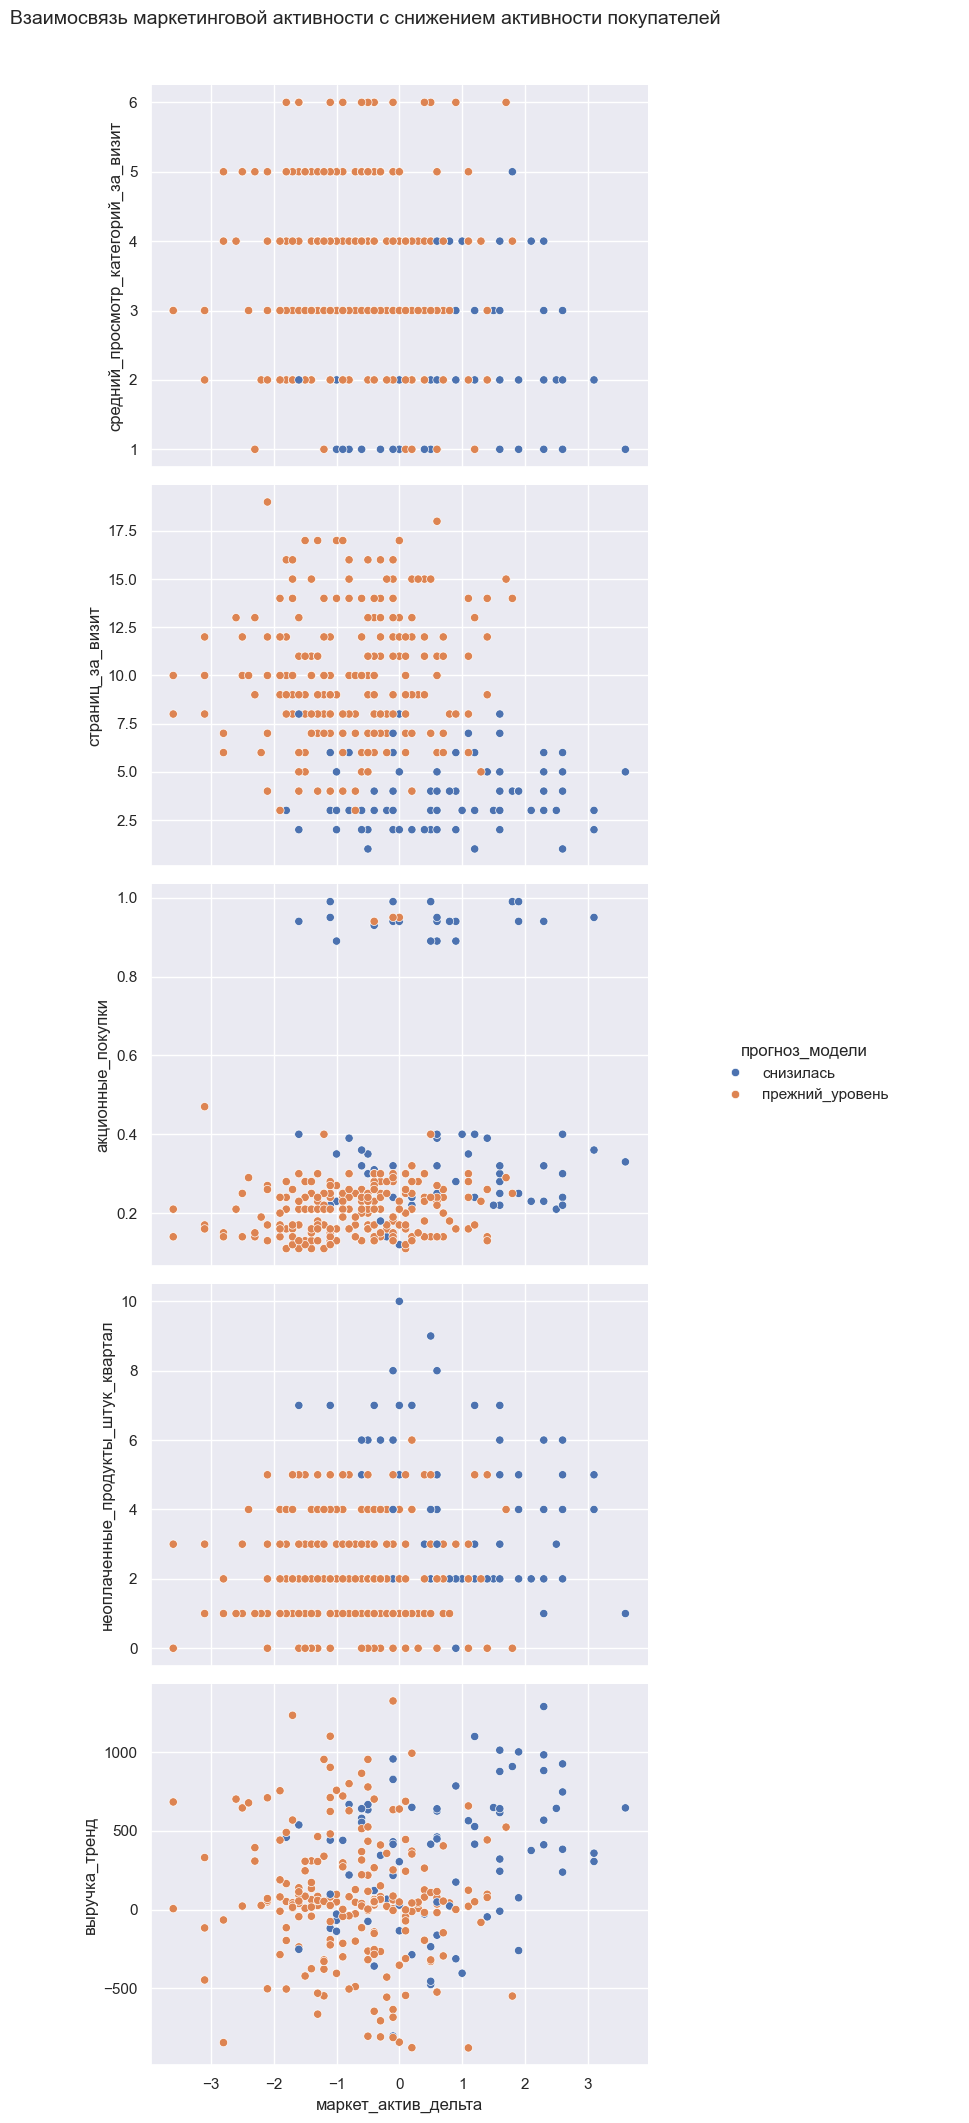

In [112]:
# Строим график для исследования взаимосвязей
plot = sns.pairplot(cust_segment, 
                    x_vars='маркет_актив_дельта', 
                    y_vars=feature_segment, 
                    hue='прогноз_модели', 
                    height=4.2)

# Настройка заголовка и подписей
plot.fig.suptitle('Взаимосвязь маркетинговой активности с снижением активности покупателей',
                  fontsize=14, y=1.01)  
plot.legend.set_bbox_to_anchor((1.5, 0.5))

# Вывод графика
plt.tight_layout()
plt.show()

### Вывод:

**Выбор исследуемого сегмента:**

Для дополнительного исследования мы взяли сегмент покупателей с высокой вероятностью снижения активностьи и с высоким уровнем прибыли, так как считаем, что потеря данной аудитории может пагубно сказаться на прибыли бизнеса.

**Выявление причины снижения активности:**

Наша гипотеза о влиянии маркетинговой стратегии на активность покупателей не может быть отвергнута, так как мы действительно наблюдаем на графиках смещения связанные с увеличением маркетинговых коммуникаций с данным сегментом, а снижение активности это её следствие. 

**Следствия от увеличения маркетинговых коммуникаций:**

* Покупатели начали больше тратить на товары на сайте
* У покупателей копятся неоплаченные товары
* Покупатели проводят столько же времени на сайте, что и раньше
* Покупатели меньше просматривают категорий
* Покупатели меньше просматривают страниц

Встает вопрос, а действительно ли это можно расценивать, как снижение активности покупателей, ведь мы наблюдаем явную успешную манипуляцию покупателями маркетинговым отделом, они своими действиями увеличивают количество выручки получаемой от покупателей.

**Предложения по дальнейшим действиям:**

* Пересмотреть оценку, что считать снижением активности, как вариант это может быть добавлен новый признак, вместо количества просмотренных страниц, количество покупок, так как бизнес все таки получает деньги не за количество просмотренных страниц и категорий, а за покупки. После пересмотра диаграммы Исикавы построить новую модель и оценить данные заново, на данный момент с моей точки зрения из-за неверной оценки активности покупателей наше дальнейшее исследование может привести к неверным выводам и действиям.


* Наблюдать дальше за этим сегментом покупателей, не будет ли такой уровень маркетинговых коммуникаций утомлять покупателей, тем самым может быть нащупан новый уровень для всех покупателей, что приведет к увеличением получаемой выручки, а в следствии и прибыли.


* Такой уровень маркетинговой коммуникации повышает количество покупок по акции, необходимо дополнительное исследование, а именно получить абсолютные значения и понаблюдать, у нас покупки по акции прибавляются к остальным покупкам, которые без акции, или начинают их замещать, так как бизнес может начать терять прибыль в таком случае.

## Общий вывод:

### Описание поставленной задачи:

**Описание проекта:**

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

**Цель проекта:**

1. Разработать модель, которая предскажет вероятность снижения покупательской активности.
2. Выделить сегмент покупателей, проанализировать его и предложить, как увеличить его покупательскую активность.

### Описание исходных данных и проведённой предобработки:

#### Описание данных:

**market_file.csv** - Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

* **id** — номер покупателя в корпоративной базе данных.
* **Покупательская активность** — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
* **Тип сервиса** — уровень сервиса, например «премиум» и «стандарт».
* **Разрешить сообщать** — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
* **Маркет_актив_6_мес** — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
* **Маркет_актив_тек_мес** — количество маркетинговых коммуникаций в текущем месяце.
* **Длительность** — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
* **Акционные_покупки** — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
* **Популярная_категория** — самая популярная категория товаров у покупателя за последние 6 месяцев.
* **Средний_просмотр_категорий_за_визит** — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
* **Неоплаченные_продукты_штук_квартал** — общее число неоплаченных товаров в корзине за последние 3 месяца.
* **Ошибка_сервиса** — число сбоев, которые коснулись покупателя во время посещения сайта.
* **Страниц_за_визит** — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

**market_money.csv** - Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
* **id** — номер покупателя в корпоративной базе данных.
* **Период** — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
* **Выручка** — сумма выручки за период.

**market_time.csv** - Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
* **id** — номер покупателя в корпоративной базе данных.
* **Период** — название периода, во время которого зафиксировано общее время.
* **минут** — значение времени, проведённого на сайте, в минутах.

**money.csv** - Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
* **id** — номер покупателя в корпоративной базе данных.
* **Прибыль** — значение прибыли.

#### Результаты предобработки данных:

**Типы данных:**

В данных датафреймах все признаки имеют корректный тип данных.

**Пропущенные значения:**

Пропущенные значения в датафреймах отсутствуют.

**Явные дубликаты:**

Явные дубликаты в датафреймах отсутствуют.

**Неявные дубликаты:**

Значения категориальных признаков были приведены к единому стилю, были исправлены ошибки в значениях, тем самым мы избавились от всех неявных дубликатов.

**Преобразование таблиц:**

В данном пункте мы задали таблицам колонку **"id"** за индекс, для удобства работы с ними в дальнейшем.

### Поиск лучшей модели:

#### Действия, которые помогли выбрать лучшую модель:

Для поиска лучшей модели и оптимальных для нее гиперпараметров были предприняты следующие действия:

1. Написаны пайплайны:
    
    * Пайплайн для кодировки данных с помощью **OneHotEncoder**.
    * Пайплайн для кодировки данных с помощью **OrdinalEncoder**.
    * Объединение пайплайнов с кодированием данных, а так же добавлено масштабирование для количественных признаков.
    * Общий пайплайн для объединения предобработки данных и обучения модели.


2. Выбрана метрика для оценки качества модели и их сравнивания между собой:
    
    Метрику в данном поиске мы использовали **ROC-AUC**, так как у нас есть дисбаланс классов в целевойм признаке (**2:3**), несмотря на то, что при делении выборки я использую стратификацию, в жизни ее мы вряд ли же будем получать в таком же соотношении, а скорее всего она будет меняться, так как мы планируем предпринимать действия для его изменения, а именно снижая количество покупателей, чья активность снижается. Таким образом наша метрика:

    * Устойчива к дисбалансу классов.
    * Поможет объективно сравнивать разные модели.

        
3. Обучены 4 разные модели без дополнительных настроек, для получения базовой метрики, по которой можно будет оценить на сколько нам помогает подбор гиперпараметров. Список моделей отобранных для поставленной задачи:

    * **LogisticRegression**
    * **KNeighborsClassifier**
    * **DecisionTreeClassifier**
    * **SVC**


4. Написан словарь для подбора гиперпараметров для моделей.


5. Запущен **GridSearchCV** для поиска лучшей модели для поставленной задачи и ее оптимальных гиперпараметров.

#### Лучшая модель:

Лушая модель полученная после **GridSearchCV** - **SVC**.

**Параметры модели:**

* kernel - **rbf**
* C - **1**, 
* gamma - **0.1**
* Лучший метод масштабирования данных - **StandardScaler**

**Значения метрик:**

* Значение ROC-AUC на тренировочных данных - **0.9**
* Значение ROC-AUC на тестовых данных - **0.895**
* Значение Accuracy - **0.88**
* Значение Precision - **0.95**
* Значени Recall - **0.72**

Из результатов этих метрик мы можем сказать, что наша модель лучше определяет покупателей, чья активность снизилась, чем тех, у кого актиновность осталась на прежнем уровне.

### Графическое аналитическое исследование:

#### Выбор исследуемого сегмента покупателей:

Для дополнительного исследования мы взяли сегмент покупателей с высокой вероятностью снижения активностьи и с высоким уровнем прибыли, так как считаем, что потеря данной аудитории может пагубно сказаться на прибыли бизнеса.

#### Результаты проведенного исследования:

**Выявление причины снижения активности:**

Наша гипотеза о влиянии маркетинговой стратегии на активность покупателей не может быть отвергнута, так как мы действительно наблюдаем на графиках смещение связанное с увеличением маркетинговых коммуникаций с данным сегментом, а снижение активности это её следствие. 

**Следствия от увеличения маркетинговых коммуникаций:**

* Покупатели начали больше тратить на товары на сайте
* У покупателей копятся неоплаченные товары
* Покупатели проводят столько же времени на сайте, что и раньше
* Покупатели меньше просматривают категорий
* Покупатели меньше просматривают страниц

Встает вопрос, а действительно ли это можно расценивать, как снижение активности покупателей, ведь мы наблюдаем явную успешную манипуляцию покупателями маркетинговым отделом, они своими действиями увеличивают количество выручки получаемой от покупателей.

#### Предложения по дальнейшей работе:

* Пересмотреть оценку, что считать снижением активности, как вариант это может быть добавлен новый признак, вместо количества просмотренных страниц, количество покупок, так как бизнес все таки получает деньги не за количество просмотренных страниц и категорий, а за покупки. После пересмотра диаграммы Исикавы построить новую модель и оценить данные заново, на данный момент с моей точки зрения из-за неверной оценки активности покупателей наше дальнейшее исследование может привести к неверным выводам и действиям.


* Наблюдать дальше за этим сегментом покупателей, не будет ли такой уровень маркетинговых коммуникаций утомлять покупателей, тем самым может быть нащупан новый уровень для всех покупателей, что приведет к увеличением получаемой выручки, а в следствии и прибыли.


* Такой уровень маркетинговой коммуникации повышает количество покупок по акции, необходимо дополнительное исследование, а именно получить абсолютные значения и понаблюдать, у нас покупки по акции прибавляются к остальным покупкам, которые без акции, или начинают их замещать, так как бизнес может начать терять прибыль в таком случае.